Описание данных

Целью работы является анализ данных онлайн-магазина подарков. Магазин зачастую отправляет товары по почте, работает как с оптовыми, так и с розничными покупателями. План работы: загрузить данные и провести их предварительную обработку, произвести расчет метрик и выявить в какое время и дни недели магазин получает наибольшую прибыль. Проверить наличие сезонности и цикличности в данных. Для анализа деятельности компании в 2019 году рассчитать стики-фактор за второй и третий квартал 2019 года. Составить профиль каждого клиента и провести rfm-сегментацию клиентов. Разделить клиентов на возвратных и нет и рассчитать средние показатели для каждой группы. На основании сегментации сформулировать рекомендации для бизнеса по взаимодействию с наиболее крупными сегментами. Сравнить доли возвратных и невозвратных клиентов за второй и третий квартал 2019 года. Сравнить средние чеки в трех странах. Проверить гипотезы: средний чек у клиентов из сегмента RFM=233 выше, чем у клиентов из сегмента RFM=323; средняя выручка от клиентов второго и третьего квартала имеют статистически значимую разницу. 

Основной датасет.
entry_date — дата записи;
order_id — идентификационный номер заказа;
customer_id — идентификационный номер клиента;
quantity — количество;
price — цена;
name_clust — автоматически присвоенная группа записи на основе названия;
entry_id — идентификационный номер записи;
country_id — идентификационный номер страны.

Текстовое описание записей. 
entry_id — идентификационный номер записи;
entry — запись.

# Шаг 1. Получение, осмотр и объединение данных

In [253]:
# Импортируем библиотеки для работы с таблицами и графиками
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [254]:
# Загрузим основной датасет в переменную df_raw
df_raw = pd.read_csv('/datasets/gift.csv')

In [255]:
# При помощи метода .copy() скопируем датасет для работы с ним в переменную df
df = df_raw.copy()
display(df)

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id
0,12/01/2018 08:26,3031,2150,6,339,740,891,28
1,12/01/2018 08:26,3031,2150,8,275,132,1596,28
2,12/01/2018 08:26,3031,2150,6,339,197,166,28
3,12/01/2018 08:26,3031,2150,2,765,767,1810,28
4,12/01/2018 08:26,3031,2150,6,425,383,2585,28
...,...,...,...,...,...,...,...,...
356935,12/09/2019 12:50,48253,7320,12,85,556,2723,5
356936,12/09/2019 12:50,48253,7320,6,210,144,1246,5
356937,12/09/2019 12:50,48253,7320,4,415,144,1241,5
356938,12/09/2019 12:50,48253,7320,4,415,114,2811,5


In [256]:
#выведем основную информацию о датасете df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356940 entries, 0 to 356939
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   entry_date   356940 non-null  object
 1   order_id     356940 non-null  int64 
 2   customer_id  356940 non-null  int64 
 3   quantity     356940 non-null  int64 
 4   price        356940 non-null  int64 
 5   name_clust   356940 non-null  int64 
 6   entry_id     356940 non-null  int64 
 7   country_id   356940 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 21.8+ MB
None


Данные содержат 356940 строк и 8 столбцов. В данных нет пропусков, однако, анализируя типы данных, видно, что в entry_date тип некорректен и необходимо его изменить. 

In [257]:
df['entry_date'] = pd.to_datetime(df['entry_date'])
df.dtypes

entry_date     datetime64[ns]
order_id                int64
customer_id             int64
quantity                int64
price                   int64
name_clust              int64
entry_id                int64
country_id              int64
dtype: object

In [258]:
display(df)

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id
0,2018-12-01 08:26:00,3031,2150,6,339,740,891,28
1,2018-12-01 08:26:00,3031,2150,8,275,132,1596,28
2,2018-12-01 08:26:00,3031,2150,6,339,197,166,28
3,2018-12-01 08:26:00,3031,2150,2,765,767,1810,28
4,2018-12-01 08:26:00,3031,2150,6,425,383,2585,28
...,...,...,...,...,...,...,...,...
356935,2019-12-09 12:50:00,48253,7320,12,85,556,2723,5
356936,2019-12-09 12:50:00,48253,7320,6,210,144,1246,5
356937,2019-12-09 12:50:00,48253,7320,4,415,144,1241,5
356938,2019-12-09 12:50:00,48253,7320,4,415,114,2811,5


In [259]:
print(df.count()) #выведем количество непустых строк в датафрейме

entry_date     356940
order_id       356940
customer_id    356940
quantity       356940
price          356940
name_clust     356940
entry_id       356940
country_id     356940
dtype: int64


In [260]:
display(df.sample(10)) #выведем 10 случайных строк датафрейма

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id
130431,2019-05-22 13:01:00,20764,5231,1,325,792,1511,28
55184,2019-02-08 14:35:00,10133,-1,2,329,901,2247,28
273131,2019-10-24 16:20:00,39208,2728,12,42,565,2080,28
141954,2019-06-07 13:37:00,22517,6950,4,165,418,2606,28
127636,2019-05-18 15:55:00,20380,3013,2,165,336,1444,28
199547,2019-08-17 11:48:00,30204,2159,1,165,516,2600,28
203101,2019-08-22 12:32:00,30704,3445,6,255,534,1671,28
65656,2019-02-24 16:30:00,11584,6919,2,850,164,1045,28
162442,2019-07-04 10:17:00,25440,-1,3,83,899,1366,28
158614,2019-06-28 08:19:00,24925,4696,2,1275,87,2223,28


In [261]:
duplicateRows = df[df.duplicated ()]
display(duplicateRows)

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id
332,2018-12-01 11:45:00,3075,2092,1,125,140,858,28
346,2018-12-01 11:45:00,3075,2092,1,495,196,1042,28
358,2018-12-01 11:49:00,3078,2080,1,295,808,1611,28
371,2018-12-01 11:49:00,3078,2080,1,295,52,1647,28
376,2018-12-01 11:49:00,3078,2080,1,210,385,588,28
...,...,...,...,...,...,...,...,...
356756,2019-12-09 11:34:00,48204,5554,1,125,817,1866,28
356770,2019-12-09 11:34:00,48204,5554,1,39,469,811,28
356781,2019-12-09 11:34:00,48204,5554,1,249,722,1538,28
356784,2019-12-09 11:34:00,48204,5554,1,195,112,2303,28


In [262]:
total_dupl = df.duplicated().sum()
share_dupl = df.duplicated().mean()
print(f'Количество дубликатов в данных = {total_dupl}, что составляет {share_dupl:.2%} от всех данных.') #доля данных достаточна мала, поэтому можно удалить данные дубликаты df = df.drop_duplicates() 

Количество дубликатов в данных = 3573, что составляет 1.00% от всех данных.


In [263]:
df = df.drop_duplicates() #так как доля дубликатов мала, удалим их 

In [264]:
#проверим, что дубликатов не осталось 
print('Количество дубликатов:', df.duplicated().sum())

#найдем долю дубликатов через mean 
print('Доля дубликатов:', df.duplicated().mean())

Количество дубликатов: 0
Доля дубликатов: 0.0


<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верная работа с дублями. Молодец!

In [265]:
# Загрузим текстовый датасет в переменную df_raw_text https://code.s3.yandex.net/python-for-analytics/gift_entry.csv'

df_raw_text = pd.read_csv("https://code.s3.yandex.net/python-for-analytics/gift_entry.csv", sep = ';')

# При помощи метода .copy() скопируем датасет для работы с ним в переменную df_text
df_text = df_raw_text.copy()
display(df_text)

,entry_id,entry
0,0,NaN
1,1,10-цветная ручка Spaceboy
2,2,"12 карандашей, черепа"
3,3,"12 карандашей, высокий тюбик, лесной массив"
4,4,"12 карандашей, маленький тюбик с черепом"
...,...,...
2912,2912,яйцо с подвесным украшением из слоновой кости
2913,2913,янтарное массивное колье из стекла+бусины
2914,2914,яркие голубые ленты
2915,2915,"ящик для хранения большой, черепа"


In [266]:
#выведем основную информацию о датасете df_text
print(df_text.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   entry_id  2917 non-null   int64 
 1   entry     2916 non-null   object
dtypes: int64(1), object(1)
memory usage: 45.7+ KB
None


Данные содержат 2917 строк и 2 столбца. Анализируя типы данных столбцов entry и entry_id, тип данных столбца entry_id корректен, а тип данных столбца entry можно заменить на тип данных str.

In [267]:
#выведем первые и последние 5 строк датасета
display(df_text.head())
display(df_text.tail())

,entry_id,entry
0,0,NaN
1,1,10-цветная ручка Spaceboy
2,2,"12 карандашей, черепа"
3,3,"12 карандашей, высокий тюбик, лесной массив"
4,4,"12 карандашей, маленький тюбик с черепом"


,entry_id,entry
2912,2912,яйцо с подвесным украшением из слоновой кости
2913,2913,янтарное массивное колье из стекла+бусины
2914,2914,яркие голубые ленты
2915,2915,"ящик для хранения большой, черепа"
2916,2916,"ящик для хранения маленький, черепа"


In [268]:
print(df_text.isna().sum()) #найдем и выведем количество пропусков в датафрейме 
print(df_text.isna().mean().apply(lambda x: f'{x:.3%}'))

entry_id    0
entry       1
dtype: int64
entry_id    0.000%
entry       0.034%
dtype: object


В датасете в столбце entry есть один пропуск. Так как в данном случае сложно предсказать, какое именно значение может быть пропущено и оно всего одно, удалим данную строку. 

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Пропуски в обоих датафреймах куплены верно!

In [269]:
df_text.dropna(inplace=True) #удалим строку с пропуском
print(df_text.isna().sum()) 

entry_id    0
entry       0
dtype: int64


In [270]:
df_text['entry'] = df_text['entry'].astype('string')
df_text.dtypes

entry_id     int64
entry       string
dtype: object

In [271]:
# Изучим уникальные значения в столбце entry_id
print(df_text['entry_id'].unique())
# Изучим уникальные значения в столбце entry (видно наличие неявных дубликатов)
print(df_text['entry'].unique())

[   1    2    3 ... 2914 2915 2916]
<StringArray>
[                    '10-цветная ручка Spaceboy',
                         '12 карандашей, черепа',
   '12 карандашей, высокий тюбик, лесной массив',
      '12 карандашей, маленький тюбик с черепом',
     '12 колышков-ромашек в деревянной коробке.',
  '12 небольших тюбиков для карандашей Woodland',
        '12 столовых колышек в виде розовых роз',
     '12 цветных воздушных шаров для вечеринки.',
         '15 розовых пушистых цыплят в коробке.',
 '2 яйца в книжке с картинками, пасхальные утки',
 ...
                      'яблочная губка для ванны',
            'яйцо из фетра уютная божья коровка',
                  'яйцо из фетра уютная курочка',
             'яйцо из фетра уютный белый кролик',
             'яйцо из фетра уютный синий кролик',
 'яйцо с подвесным украшением из слоновой кости',
     'янтарное массивное колье из стекла+бусины',
                           'яркие голубые ленты',
             'ящик для хранения большой, чере

In [272]:
df_text['entry_new'] = df_text['entry'].str.lower() # приведем столбец значени й к нижнему регистру
df_text['entry_new'] = df_text['entry_new'].str.replace(r'[^\w\s]', '',  regex=True) #уберем лишние знаки препинания в значениях
df_text.drop_duplicates(subset=['entry_new'], keep='first', inplace=True) #оставим только первые значения дубликатов 
display(df_text['entry_new'])

1                            10цветная ручка spaceboy
2                                12 карандашей черепа
3           12 карандашей высокий тюбик лесной массив
4             12 карандашей маленький тюбик с черепом
5             12 колышковромашек в деревянной коробке
                            ...                      
2912    яйцо с подвесным украшением из слоновой кости
2913         янтарное массивное колье из стеклабусины
2914                              яркие голубые ленты
2915                 ящик для хранения большой черепа
2916               ящик для хранения маленький черепа
Name: entry_new, Length: 2909, dtype: string

In [273]:
counts = df_text['entry_new'].value_counts()  # Подсчет количества каждого уникального значения
repeated_values = counts[counts > 1].index.tolist()  # Фильтрация значений, которые встречаются более одного раза
df_text[df_text['entry_new'].isin(repeated_values)]
df_text_sorted = df_text.sort_values(by='entry_new')
display(df_text_sorted)

,entry_id,entry,entry_new
1,1,10-цветная ручка Spaceboy,10цветная ручка spaceboy
3,3,"12 карандашей, высокий тюбик, лесной массив",12 карандашей высокий тюбик лесной массив
4,4,"12 карандашей, маленький тюбик с черепом",12 карандашей маленький тюбик с черепом
2,2,"12 карандашей, черепа",12 карандашей черепа
5,5,12 колышков-ромашек в деревянной коробке.,12 колышковромашек в деревянной коробке
...,...,...,...
2913,2913,янтарное массивное колье из стекла+бусины,янтарное массивное колье из стеклабусины
2914,2914,яркие голубые ленты,яркие голубые ленты
834,834,"Ящик для свечей с ароматом розы, украшенный др...",ящик для свечей с ароматом розы украшенный дра...
2915,2915,"ящик для хранения большой, черепа",ящик для хранения большой черепа


In [274]:
#найдем долю явных дубликатов от  всех данных
total_dupl_text = df_text.duplicated().sum()
share_dupl_text = df_text.duplicated().mean()
print(f'Количество дубликатов в данных = {total_dupl_text}, что составляет {share_dupl_text:.2%} от всех данных.') #доля данных достаточна мала, поэтому можно удалить данные дубликаты df = df.drop_duplicates() 

Количество дубликатов в данных = 0, что составляет 0.00% от всех данных.


<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошо!

In [275]:
# Сравним данные столбцов entry_id двух датафреймов
display(df['entry_id'])
display(df_text['entry_id']) # не все данные столбцов entry_id совпадают

0          891
1         1596
2          166
3         1810
4         2585
          ... 
356935    2723
356936    1246
356937    1241
356938    2811
356939    1818
Name: entry_id, Length: 353367, dtype: int64

1          1
2          2
3          3
4          4
5          5
        ... 
2912    2912
2913    2913
2914    2914
2915    2915
2916    2916
Name: entry_id, Length: 2909, dtype: int64

In [276]:
# Так как датафрейм df содержит большее количество строчек и является основным, объединим данные датафреймы по столбцу entry_id, используя how='left'
df_merge = df.merge(df_text, on=['entry_id'], how='left')
display(df_merge)
df_merge.info()

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,entry_new
0,2018-12-01 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,белый металлический фонарь
1,2018-12-01 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона,кремовая вешалка в форме сердечек купидона
2,2018-12-01 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза,вязаная грелка с флагом союза
3,2018-12-01 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,набор 7 скворечников для бабушек
4,2018-12-01 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,стеклянный матовый держатель в форме звезды
...,...,...,...,...,...,...,...,...,...,...
353362,2019-12-09 12:50:00,48253,7320,12,85,556,2723,5,упаковка из 20 салфеток для космонавтов,упаковка из 20 салфеток для космонавтов
353363,2019-12-09 12:50:00,48253,7320,6,210,144,1246,5,детский фартук для девочки-долли,детский фартук для девочкидолли
353364,2019-12-09 12:50:00,48253,7320,4,415,144,1241,5,детские столовые приборы Долли девочка,детские столовые приборы долли девочка
353365,2019-12-09 12:50:00,48253,7320,4,415,114,2811,5,цирковой парад детских столовых приборов,цирковой парад детских столовых приборов


<class 'pandas.core.frame.DataFrame'>
Int64Index: 353367 entries, 0 to 353366
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   entry_date   353367 non-null  datetime64[ns]
 1   order_id     353367 non-null  int64         
 2   customer_id  353367 non-null  int64         
 3   quantity     353367 non-null  int64         
 4   price        353367 non-null  int64         
 5   name_clust   353367 non-null  int64         
 6   entry_id     353367 non-null  int64         
 7   country_id   353367 non-null  int64         
 8   entry        351232 non-null  string        
 9   entry_new    351232 non-null  string        
dtypes: datetime64[ns](1), int64(7), string(2)
memory usage: 29.7 MB


In [277]:
print(df_merge.isna().mean().apply(lambda x: f'{x:.1%}'))

entry_date     0.0%
order_id       0.0%
customer_id    0.0%
quantity       0.0%
price          0.0%
name_clust     0.0%
entry_id       0.0%
country_id     0.0%
entry          0.6%
entry_new      0.6%
dtype: object


Доля пропусков в столбце entry составила 0,4% , что достаточно мало, поэтому удалим строки с данными пропусками.

In [278]:
df_merge.dropna(inplace=True)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351232 entries, 0 to 353366
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   entry_date   351232 non-null  datetime64[ns]
 1   order_id     351232 non-null  int64         
 2   customer_id  351232 non-null  int64         
 3   quantity     351232 non-null  int64         
 4   price        351232 non-null  int64         
 5   name_clust   351232 non-null  int64         
 6   entry_id     351232 non-null  int64         
 7   country_id   351232 non-null  int64         
 8   entry        351232 non-null  string        
 9   entry_new    351232 non-null  string        
dtypes: datetime64[ns](1), int64(7), string(2)
memory usage: 29.5 MB


Остались полностью заполненые строки.  

Вывод: проведена первичная обработка и анализ данных в датафреймах, изменены типы данных в столбцах entry и entry_data, устранены дубликаты и пропуски в данных. Исходные датафреймы объединены после первичной обработки в один df_merge. Итоговый датафрейм df_merge содержит 351858 строк и 9 столбцов.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хороший обзор данных из файла!

# Шаг 2. Предобработка и начало исследовательского анализа

In [279]:
# Изучим столбец price на наличие выбросов и аномальных значений
print(df_merge['price'].describe())

# Изучим столбец quantity на наличие выбросов и аномальных значений
print(df_merge['quantity'].describe())

count    3.512320e+05
mean     4.037386e+02
std      5.099968e+03
min     -1.106206e+06
25%      1.250000e+02
50%      2.080000e+02
75%      4.130000e+02
max      1.354133e+06
Name: price, dtype: float64
count    351232.000000
mean         10.314778
std         146.807026
min       -9600.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64


На основании описания данных столбца price можно отметить, что среднее и медианное значения различаются, если посмотреть на 75% процентиль и максимальное значение, видно, что присутствуют выбросы или аномалии. Также, видны некорректные значения для price меньше 0. Можно построить boxplot или гистограмму для наглядного представления распределения. 

Quantity содержит также выбросы и аномальные значения, так как количество не может быть отрицательным. Также, различаются среднее и медианное значения. Необходимо проанализировать эти данные более подробно.

In [280]:
filtered_price = df_merge.query('price < 0') #отобразим данные меньше 0

filtered_ratio_price = len(filtered_price) / len(df_merge) #посчитаем какова доля данных меньше 0

print(f'Доля данных price меньше 0:{filtered_ratio_price:.5%}')

Доля данных price меньше 0:0.00057%


Доля данных price меньше 0 небольшая, поэтому можно отфильтровать эти данные.

In [281]:
df_merge = df_merge.query('price >= 0') #отфильтруем данные меньше 0
display(df_merge)

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,entry_new
0,2018-12-01 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,белый металлический фонарь
1,2018-12-01 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона,кремовая вешалка в форме сердечек купидона
2,2018-12-01 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза,вязаная грелка с флагом союза
3,2018-12-01 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,набор 7 скворечников для бабушек
4,2018-12-01 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,стеклянный матовый держатель в форме звезды
...,...,...,...,...,...,...,...,...,...,...
353362,2019-12-09 12:50:00,48253,7320,12,85,556,2723,5,упаковка из 20 салфеток для космонавтов,упаковка из 20 салфеток для космонавтов
353363,2019-12-09 12:50:00,48253,7320,6,210,144,1246,5,детский фартук для девочки-долли,детский фартук для девочкидолли
353364,2019-12-09 12:50:00,48253,7320,4,415,144,1241,5,детские столовые приборы Долли девочка,детские столовые приборы долли девочка
353365,2019-12-09 12:50:00,48253,7320,4,415,114,2811,5,цирковой парад детских столовых приборов,цирковой парад детских столовых приборов


In [282]:
filtered_quantity = df_merge.query('quantity < 0') #отобразим данные меньше 0

filtered_ratio_quantity = len(filtered_quantity) / len(df_merge) #посчитаем какова доля данных меньше 0

print(f'Доля данных quantity меньше 0:{filtered_ratio_quantity:.5%}')

Доля данных quantity меньше 0:0.03530%


Доля данных price меньше 0 небольшая, поэтому можно отфильтровать эти данные.

In [283]:
df_merge = df_merge.query('quantity >= 0') #отфильтруем данные меньше 0
display(df_merge)

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,entry_new
0,2018-12-01 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,белый металлический фонарь
1,2018-12-01 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона,кремовая вешалка в форме сердечек купидона
2,2018-12-01 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза,вязаная грелка с флагом союза
3,2018-12-01 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,набор 7 скворечников для бабушек
4,2018-12-01 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,стеклянный матовый держатель в форме звезды
...,...,...,...,...,...,...,...,...,...,...
353362,2019-12-09 12:50:00,48253,7320,12,85,556,2723,5,упаковка из 20 салфеток для космонавтов,упаковка из 20 салфеток для космонавтов
353363,2019-12-09 12:50:00,48253,7320,6,210,144,1246,5,детский фартук для девочки-долли,детский фартук для девочкидолли
353364,2019-12-09 12:50:00,48253,7320,4,415,144,1241,5,детские столовые приборы Долли девочка,детские столовые приборы долли девочка
353365,2019-12-09 12:50:00,48253,7320,4,415,114,2811,5,цирковой парад детских столовых приборов,цирковой парад детских столовых приборов


In [284]:
#выведем информацю об итоговом датафрейме
display(df_merge.describe())

,order_id,customer_id,quantity,price,name_clust,entry_id,country_id
count,351106.000000,351106.000000,351106.000000,3.511060e+05,351106.000000,351106.000000,351106.000000
mean,26665.988337,3494.925515,10.587096,4.101848e+02,470.617833,1522.801425,26.735487
std,13375.078715,2544.509869,143.108479,4.363864e+03,257.954074,828.850888,5.008623
min,3031.000000,-1.000000,1.000000,0.000000e+00,0.000000,1.000000,0.000000
25%,14830.000000,-1.000000,1.000000,1.250000e+02,244.000000,891.000000,28.000000
50%,27316.000000,3640.000000,3.000000,2.080000e+02,448.000000,1561.000000,28.000000
75%,38490.000000,5643.000000,10.000000,4.130000e+02,704.000000,2223.000000,28.000000
max,48253.000000,7653.000000,80995.000000,1.354133e+06,929.000000,2916.000000,29.000000


In [285]:
print(df_merge[['price', 'quantity']].corr())

             price  quantity
price     1.000000 -0.003829
quantity -0.003829  1.000000


Матрица корреляции отображает значения очень слабой отрицательной корреляции между столбцами price и quantity. 

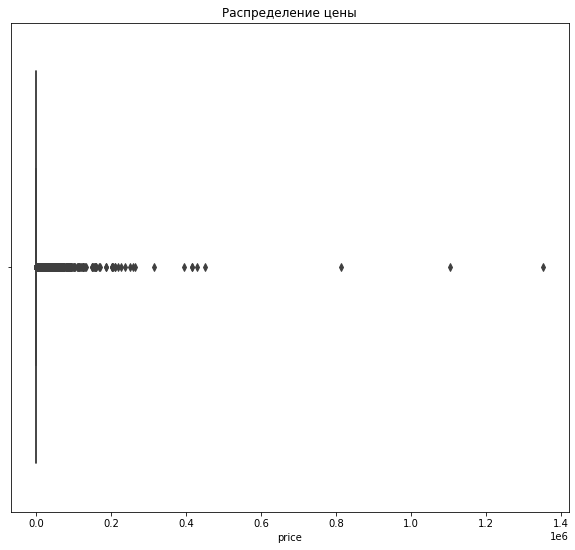

Верхний порог = 845.0


In [286]:
#Построение boxplot для 'price'
plt.figure(figsize=(10, 9))
sns.boxplot(x=df_merge['price'])
plt.title('Распределение цены')
plt.show()
q3, q1 = np.percentile(df_merge['price'], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5*IQR
print(f'Верхний порог = {upper_bound}')
filtered_df = df_merge[(df_merge['price'] >= 0 ) & (df_merge['price'] < upper_bound)] #отфильтруем данные выше верхнего порога 

In [287]:
filtered_price = df_merge.query('price > 845') #отобразим данные больше 845

filtered_ratio_price = len(filtered_price) / len(df_merge) #посчитаем какова доля данных больше 845

print(f'Доля данных price больше 845:{filtered_ratio_price:.5%}')

Доля данных price больше 845:7.64983%


Доля данных выше 845, то есть выше 75% слишклм большая, не будем удалить. 

In [288]:
#найдем квантиль 99
q99 = np.percentile(df_merge['price'], 99)
print(f'Квантиль 99 = {q99}')

Квантиль 99 = 1995.0


In [289]:
filtered_price = df_merge.query('price > 1995') #отобразим данные больше 1995

filtered_ratio_price = len(filtered_price) / len(df_merge) #посчитаем какова доля данных больше 1995

print(f'Доля данных price больше 1995: {filtered_ratio_price:.5%}')

Доля данных price больше 1995: 0.97150%


Доля данных выше 1995, то есть выше 99% достаточно мала, отфильтруем её.

In [290]:
df_merge = df_merge.query('price <= 1995') #отфильтруем данные выше 1995
display(df_merge)

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,entry_new
0,2018-12-01 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,белый металлический фонарь
1,2018-12-01 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона,кремовая вешалка в форме сердечек купидона
2,2018-12-01 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза,вязаная грелка с флагом союза
3,2018-12-01 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,набор 7 скворечников для бабушек
4,2018-12-01 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,стеклянный матовый держатель в форме звезды
...,...,...,...,...,...,...,...,...,...,...
353362,2019-12-09 12:50:00,48253,7320,12,85,556,2723,5,упаковка из 20 салфеток для космонавтов,упаковка из 20 салфеток для космонавтов
353363,2019-12-09 12:50:00,48253,7320,6,210,144,1246,5,детский фартук для девочки-долли,детский фартук для девочкидолли
353364,2019-12-09 12:50:00,48253,7320,4,415,144,1241,5,детские столовые приборы Долли девочка,детские столовые приборы долли девочка
353365,2019-12-09 12:50:00,48253,7320,4,415,114,2811,5,цирковой парад детских столовых приборов,цирковой парад детских столовых приборов


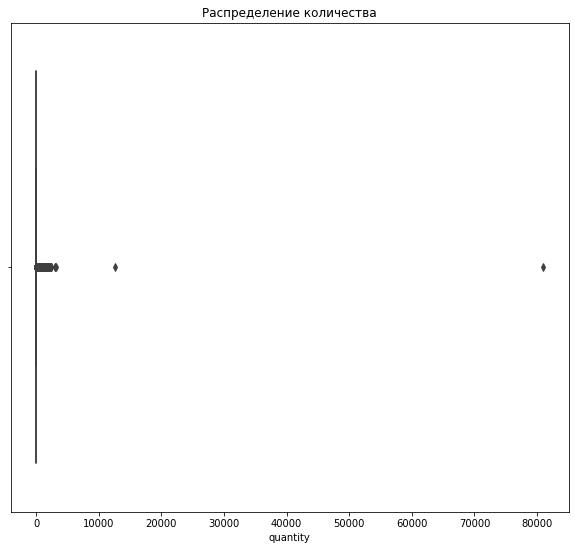

In [291]:
# Построение boxplot для 'quantity'
plt.figure(figsize=(10, 9))
sns.boxplot(x=df_merge['quantity'])
plt.title('Распределение количества')
plt.show()

In [292]:
q3, q1 = np.percentile(df_merge['quantity'], [75, 25])
IQR = q3 - q1
upper_bound = q3 + 1.5*IQR
print(f'Верхний порог = {upper_bound}')

Верхний порог = 23.5


In [293]:
filtered_df = df_merge[(df_merge['quantity'] >= 0 ) & (df_merge['quantity'] < upper_bound)] #отфильтруем данные выше верхнего порога

In [294]:
filtered_quantity = df_merge.query('quantity > 23.5') #отобразим данные больше 23.5

filtered_ratio_quantity = len(filtered_quantity) / len(df_merge) #посчитаем какова доля данных больше 23.5

print(f'Доля данных quantity больше 23.5:{filtered_ratio_quantity:.5%}')

Доля данных quantity больше 23.5:11.07091%


Доля данных выше 23.5, то есть выше 75% слишком большая, ее нельзя удалить. 

In [295]:
#найдем квантиль 99
q99 = np.percentile(df_merge['quantity'], 99)
print(f'Квантиль 99 = {q99}')

Квантиль 99 = 100.0


In [296]:
filtered_quantity = df_merge.query('quantity > 100') #отобразим данные больше 100

filtered_ratio_quantity = len(filtered_quantity) / len(df_merge) #посчитаем какова доля данных больше 100

print(f'Доля данных quantity больше 100:{filtered_ratio_quantity:.5%}')

Доля данных quantity больше 100:0.92524%


Доля данных выше 100, то есть выше 99% достаточно мала, отфильтруем её.

In [297]:
df_merge = df_merge.query('quantity < 100') #отфильтруем данные выше 100
display(df_merge)

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,entry_new
0,2018-12-01 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,белый металлический фонарь
1,2018-12-01 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона,кремовая вешалка в форме сердечек купидона
2,2018-12-01 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза,вязаная грелка с флагом союза
3,2018-12-01 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,набор 7 скворечников для бабушек
4,2018-12-01 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,стеклянный матовый держатель в форме звезды
...,...,...,...,...,...,...,...,...,...,...
353362,2019-12-09 12:50:00,48253,7320,12,85,556,2723,5,упаковка из 20 салфеток для космонавтов,упаковка из 20 салфеток для космонавтов
353363,2019-12-09 12:50:00,48253,7320,6,210,144,1246,5,детский фартук для девочки-долли,детский фартук для девочкидолли
353364,2019-12-09 12:50:00,48253,7320,4,415,144,1241,5,детские столовые приборы Долли девочка,детские столовые приборы долли девочка
353365,2019-12-09 12:50:00,48253,7320,4,415,114,2811,5,цирковой парад детских столовых приборов,цирковой парад детских столовых приборов


<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Эти столбцы исследованы правильно, молодец!

In [298]:
revenue_on_position = df_merge.groupby('entry_new')['price'].sum() #посчитаем суммарную выручку по товарным позициям
display(revenue_on_position)

entry_new
10цветная ручка spaceboy                                      32658
12 карандашей высокий тюбик лесной массив                     23569
12 карандашей маленький тюбик с черепом                       26690
12 карандашей черепа                                          24619
12 колышковромашек в деревянной коробке                       14865
                                                              ...  
янтарное массивное колье из стеклабусины                       9525
яркие голубые ленты                                           14241
ящик для свечей с ароматом розы украшенный драгоценностями    17422
ящик для хранения большой черепа                              13932
ящик для хранения маленький черепа                            13226
Name: price, Length: 2814, dtype: int64

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Да, молодец!

In [299]:
df_merge['revenue_on_position'] = df_merge.groupby('entry_new')['price'].transform('sum') #добавим столбец
display(df_merge)

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,entry_new,revenue_on_position
0,2018-12-01 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,белый металлический фонарь,143277
1,2018-12-01 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона,кремовая вешалка в форме сердечек купидона,120617
2,2018-12-01 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза,вязаная грелка с флагом союза,240421
3,2018-12-01 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,набор 7 скворечников для бабушек,370005
4,2018-12-01 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,стеклянный матовый держатель в форме звезды,69252
...,...,...,...,...,...,...,...,...,...,...,...
353362,2019-12-09 12:50:00,48253,7320,12,85,556,2723,5,упаковка из 20 салфеток для космонавтов,упаковка из 20 салфеток для космонавтов,14743
353363,2019-12-09 12:50:00,48253,7320,6,210,144,1246,5,детский фартук для девочки-долли,детский фартук для девочкидолли,74479
353364,2019-12-09 12:50:00,48253,7320,4,415,144,1241,5,детские столовые приборы Долли девочка,детские столовые приборы долли девочка,124786
353365,2019-12-09 12:50:00,48253,7320,4,415,114,2811,5,цирковой парад детских столовых приборов,цирковой парад детских столовых приборов,67852


In [300]:
sum_quantity_on_positition = df_merge.groupby('entry_new')['quantity'].sum() #посчитаем суммарное количество по каждой товарной позиции
display(sum_quantity_on_positition)

entry_new
10цветная ручка spaceboy                                      5172
12 карандашей высокий тюбик лесной массив                     1902
12 карандашей маленький тюбик с черепом                       4666
12 карандашей черепа                                          2127
12 колышковромашек в деревянной коробке                        296
                                                              ... 
янтарное массивное колье из стеклабусины                         8
яркие голубые ленты                                            513
ящик для свечей с ароматом розы украшенный драгоценностями     121
ящик для хранения большой черепа                                87
ящик для хранения маленький черепа                              96
Name: quantity, Length: 2814, dtype: int64

In [301]:
price_for_position = revenue_on_position/sum_quantity_on_positition #рассчитаем стоимость каждой товарной позиции
display(price_for_position)

entry_new
10цветная ручка spaceboy                                         6.314385
12 карандашей высокий тюбик лесной массив                       12.391693
12 карандашей маленький тюбик с черепом                          5.720103
12 карандашей черепа                                            11.574518
12 колышковромашек в деревянной коробке                         50.219595
                                                                 ...     
янтарное массивное колье из стеклабусины                      1190.625000
яркие голубые ленты                                             27.760234
ящик для свечей с ароматом розы украшенный драгоценностями     143.983471
ящик для хранения большой черепа                               160.137931
ящик для хранения маленький черепа                             137.770833
Length: 2814, dtype: float64

In [302]:
df_merge['revenue'] = df_merge['price'] * df_merge['quantity'] #вычислим и добавим столбец с выручкой
display(df_merge['revenue'])

0         2034
1         2200
2         2034
3         1530
4         2550
          ... 
353362    1020
353363    1260
353364    1660
353365    1660
353366    1485
Name: revenue, Length: 343137, dtype: int64

In [303]:
amber_massive_necklace = df_merge.query('entry_new == "янтарное массивное колье из стеклабусины"') #отобразим данные entry = янтарное массивное колье из стеклабусины

ratio_amber_massive_necklace = len(amber_massive_necklace) / len(df_merge) #посчитаем какова доля данных entry = янтарное массивное колье из стеклабусины

print(f'Доля данных entry = янтарное массивное колье из стеклабусины :{ratio_amber_massive_necklace:.9%}')

Доля данных entry = янтарное массивное колье из стеклабусины :0.002331430%


Цена "янтарное массивное колье из стекла+бусины" кажется подозрительно высокой. Доля данных со значением "янтарное массивное колье из стеклабусины" в столбце entry очень мала, поэтму можно устранить эти данные.

In [305]:
df_merge = df_merge[df_merge['entry_new'] != 'янтарное массивное колье из стеклабусины'] #отфильтруем данные в столбце entry = янтарное массивное колье из стеклабусины
display(df_merge)

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,entry_new,revenue_on_position,revenue
0,2018-12-01 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,белый металлический фонарь,143277,2034
1,2018-12-01 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона,кремовая вешалка в форме сердечек купидона,120617,2200
2,2018-12-01 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза,вязаная грелка с флагом союза,240421,2034
3,2018-12-01 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,набор 7 скворечников для бабушек,370005,1530
4,2018-12-01 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,стеклянный матовый держатель в форме звезды,69252,2550
...,...,...,...,...,...,...,...,...,...,...,...,...
353362,2019-12-09 12:50:00,48253,7320,12,85,556,2723,5,упаковка из 20 салфеток для космонавтов,упаковка из 20 салфеток для космонавтов,14743,1020
353363,2019-12-09 12:50:00,48253,7320,6,210,144,1246,5,детский фартук для девочки-долли,детский фартук для девочкидолли,74479,1260
353364,2019-12-09 12:50:00,48253,7320,4,415,144,1241,5,детские столовые приборы Долли девочка,детские столовые приборы долли девочка,124786,1660
353365,2019-12-09 12:50:00,48253,7320,4,415,114,2811,5,цирковой парад детских столовых приборов,цирковой парад детских столовых приборов,67852,1660


In [306]:
display(df_merge.describe())
display(df_merge.info())

,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,revenue_on_position,revenue
count,343129.000000,343129.000000,343129.000000,343129.00000,343129.000000,343129.000000,343129.000000,3.431290e+05,343129.000000
mean,26695.035217,3502.258311,7.675586,303.21331,472.284427,1523.497740,26.765199,1.227677e+05,1447.918433
std,13387.348045,2539.945154,11.258247,297.05086,257.113859,827.999206,4.966655,2.066333e+05,2486.647790
min,3031.000000,-1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000e+00,0.000000
25%,14833.000000,-1.000000,1.000000,125.00000,246.000000,891.000000,28.000000,2.167600e+04,348.000000
50%,27380.000000,3650.000000,3.000000,208.00000,450.000000,1561.000000,28.000000,5.868900e+04,867.000000
75%,38513.000000,5656.000000,10.000000,413.00000,706.000000,2223.000000,28.000000,1.381210e+05,1660.000000
max,48253.000000,7653.000000,99.000000,1995.00000,929.000000,2916.000000,29.000000,2.065986e+06,191424.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 343129 entries, 0 to 353366
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   entry_date           343129 non-null  datetime64[ns]
 1   order_id             343129 non-null  int64         
 2   customer_id          343129 non-null  int64         
 3   quantity             343129 non-null  int64         
 4   price                343129 non-null  int64         
 5   name_clust           343129 non-null  int64         
 6   entry_id             343129 non-null  int64         
 7   country_id           343129 non-null  int64         
 8   entry                343129 non-null  string        
 9   entry_new            343129 non-null  string        
 10  revenue_on_position  343129 non-null  int64         
 11  revenue              343129 non-null  int64         
dtypes: datetime64[ns](1), int64(9), string(2)
memory usage: 34.0 MB


None

In [307]:
## Изучим уникальные значения в столбце order_id
display(df_merge['order_id'].nunique())
print(df_merge['order_id'].unique())

18356

[ 3031  3032  3033 ... 48251 48252 48253]


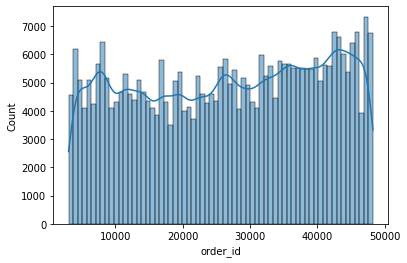

In [308]:
sns.histplot(df_merge['order_id'], kde=True) #построим гистограмму для order_id
plt.show()

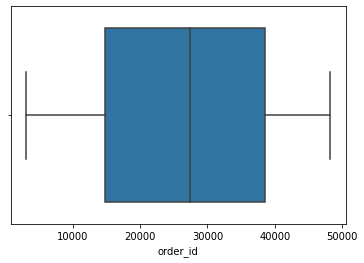

In [309]:
sns.boxplot(x = df_merge['order_id']) #построим boxplot
plt.show()

Среднее значение и медианное разные, но не сильно различаются, поэтому можно предположить, что выбросы и аномалии отсутствуют.

In [310]:
Q1 = df_merge['order_id'].quantile(0.25) #найдем первый квантиль
Q3 = df_merge['order_id'].quantile(0.75) #найдем третий квантиль 
IQR = Q3 - Q1
print(Q1,Q3)

14833.0 38513.0


In [311]:
# Находим выбросы
outliers_order_id = df_merge[(df_merge['order_id'] < (Q1 - 1.5 * IQR)) | (df_merge['order_id'] > (Q3 + 1.5 * IQR))]

print(outliers_order_id)

Empty DataFrame
Columns: [entry_date, order_id, customer_id, quantity, price, name_clust, entry_id, country_id, entry, entry_new, revenue_on_position, revenue]
Index: []


Выбросов и аномалий нет, оставим данные как есть. 

In [312]:
## Изучим уникальные значения в столбце customer_id
print(df_merge['customer_id'].nunique())
print(df_merge['customer_id'].unique())

4201
[2150 6953 7417 ... 6702 5431 7287]


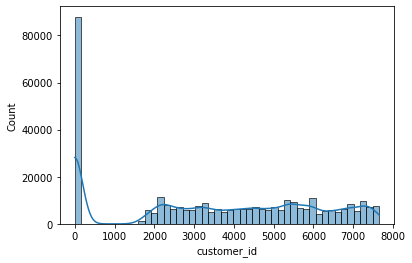

In [313]:
sns.histplot(df_merge['customer_id'], kde=True)#построим гистограмму для customer_id
plt.show()

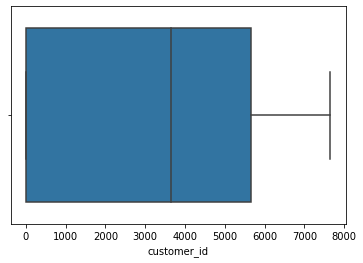

In [314]:
sns.boxplot(x = df_merge['customer_id']) #построим boxplot
plt.show()

На графике заметен выброс со значением -1, что является некорректным для данного столбца значений. 

In [315]:
filtered_customer_id = df_merge.query('customer_id == -1') #отобразим данные с идентификационным номером -1

filtered_customer_id_share = len(filtered_customer_id) / len(df_merge) #посчитаем какова доля таких данных 

print(f'Доля данных с идентификационным -1:{filtered_customer_id_share:.2%}')

Доля данных с идентификационным -1:25.61%


Доля данным со значением -1 в столбце customer_id большая, однако все эти данные принадлежат явно одной группе, которая может быть, например, сервисным аккаунтом.

In [316]:
df_merge = df_merge.query('customer_id != -1')
display(df_merge)

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,entry_new,revenue_on_position,revenue
0,2018-12-01 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,белый металлический фонарь,143277,2034
1,2018-12-01 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона,кремовая вешалка в форме сердечек купидона,120617,2200
2,2018-12-01 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза,вязаная грелка с флагом союза,240421,2034
3,2018-12-01 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,набор 7 скворечников для бабушек,370005,1530
4,2018-12-01 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,стеклянный матовый держатель в форме звезды,69252,2550
...,...,...,...,...,...,...,...,...,...,...,...,...
353362,2019-12-09 12:50:00,48253,7320,12,85,556,2723,5,упаковка из 20 салфеток для космонавтов,упаковка из 20 салфеток для космонавтов,14743,1020
353363,2019-12-09 12:50:00,48253,7320,6,210,144,1246,5,детский фартук для девочки-долли,детский фартук для девочкидолли,74479,1260
353364,2019-12-09 12:50:00,48253,7320,4,415,144,1241,5,детские столовые приборы Долли девочка,детские столовые приборы долли девочка,124786,1660
353365,2019-12-09 12:50:00,48253,7320,4,415,114,2811,5,цирковой парад детских столовых приборов,цирковой парад детских столовых приборов,67852,1660


In [317]:
print(df_merge['customer_id'].unique()) #убедимся, что данные с -1 исключены

[2150 6953 7417 ... 6702 5431 7287]


In [318]:
Q1 = df_merge['customer_id'].quantile(0.25)#найдем первый квантиль
Q3 = df_merge['customer_id'].quantile(0.75) #найдем третий квантиль
IQR = Q3 - Q1
print(Q1,Q3)

3187.0 6117.0


In [319]:
# Находим выбросы
outliers_customer_id = df_merge[(df_merge['customer_id'] < (Q1 - 1.5 * IQR)) | (df_merge['customer_id'] > (Q3 + 1.5 * IQR))]
print(outliers_customer_id)

Empty DataFrame
Columns: [entry_date, order_id, customer_id, quantity, price, name_clust, entry_id, country_id, entry, entry_new, revenue_on_position, revenue]
Index: []


Выбросов и аномалий нет, оставим данные как есть.

In [320]:
## Изучим уникальные значения в столбце name_clust
print(df_merge['name_clust'].nunique())
display(df_merge['name_clust'].unique())

892


array([740, 132, 197, 767, 383, 140, 309,   7,  68, 721, 722, 399, 177,
        82,  38, 864, 312, 241, 165,   3, 585, 792, 530, 517, 323, 566,
       167, 168, 835,   1, 187, 580, 727, 726, 699, 898, 426, 413, 839,
       832, 427, 534, 852, 359, 768, 416, 914, 786, 927, 744,  89, 159,
       227, 881, 328, 617, 155, 729, 357, 803, 469, 632, 252, 615,  35,
        62, 424, 872, 841, 402, 770, 742, 434, 457, 723, 156, 388, 732,
       447, 456, 122, 103, 499, 396, 802, 334, 662, 256, 693, 880, 603,
       445, 112, 127, 608, 289, 340, 213, 175, 185, 821, 564, 356, 531,
       861, 195, 196, 526,  95, 311, 761, 224, 570, 836, 429, 217, 116,
       226, 790, 800, 820,  18,  28, 866, 532, 108, 516, 418, 664, 896,
       618, 853, 704, 639, 766,  45, 102, 758, 667, 694, 107, 355, 229,
       536, 680, 110, 231, 234, 479, 120, 362, 171, 591, 846, 223,  69,
       364, 397, 431,  70,  25, 411, 882, 143, 188, 244, 548, 754,  54,
       542, 358, 147, 550, 360, 403, 523, 415,  46, 285, 808, 70

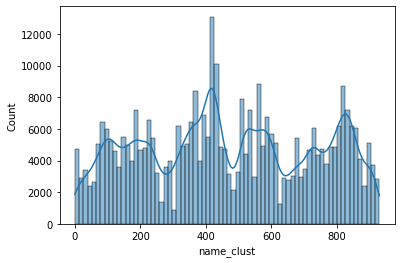

In [321]:
sns.histplot(df['name_clust'], kde=True)#построим гистограмму для name_clust
plt.show()


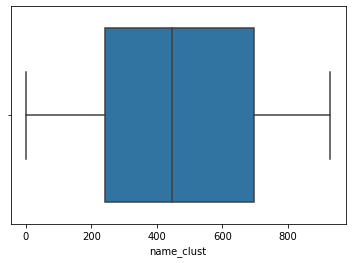

In [322]:
sns.boxplot(x = df_merge['name_clust']) #построим boxplot
plt.show()

Среднее значение и медианное разные, но не сильно различаются, поэтому можно предположить, что выбросы и аномалии отсутствуют. 

In [323]:
Q1 = df_merge['name_clust'].quantile(0.25)#найдем первый квантиль
Q3 = df_merge['name_clust'].quantile(0.75) #найдем третий квантиль
IQR = Q3 - Q1
print(Q1,Q3)

241.0 697.0


In [324]:
# Находим выбросы
outliers_name_clust = df_merge[(df_merge['name_clust'] < (Q1 - 1.5 * IQR)) | (df_merge['name_clust'] > (Q3 + 1.5 * IQR))]
print(outliers_name_clust)

Empty DataFrame
Columns: [entry_date, order_id, customer_id, quantity, price, name_clust, entry_id, country_id, entry, entry_new, revenue_on_position, revenue]
Index: []


Выбросов и аномалий нет, оставим данные как есть.

In [325]:
## Изучим уникальные значения в столбце entry_id
print(df_merge['entry_id'].nunique())
print(df_merge['entry_id'].unique())

2677
[ 891 1596  166 ...  915  547 1600]


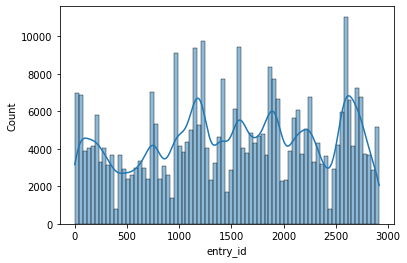

In [326]:
sns.histplot(df['entry_id'], kde=True)#построим гистограмму для entry_id
plt.show()

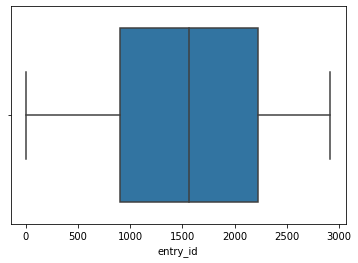

In [327]:
sns.boxplot(x = df_merge['entry_id']) #построим boxplot
plt.show()

Среднее значение и медианное разные, но не сильно различаются, поэтому можно предположить, что выбросы и аномалии отсутствуют.

In [328]:
Q1 = df_merge['entry_id'].quantile(0.25)#найдем первый квантиль
Q3 = df_merge['entry_id'].quantile(0.75) #найдем третий квантиль
IQR = Q3 - Q1
print(Q1,Q3)

898.0 2223.0


In [329]:
# Находим выбросы
outliers_entry_id = df_merge[(df_merge['entry_id'] < (Q1 - 1.5 * IQR)) | (df_merge['entry_id'] > (Q3 + 1.5 * IQR))]
print(outliers_entry_id)

Empty DataFrame
Columns: [entry_date, order_id, customer_id, quantity, price, name_clust, entry_id, country_id, entry, entry_new, revenue_on_position, revenue]
Index: []


Выбросов и аномалий нет, оставим данные как есть.

In [330]:
## Изучим уникальные значения в столбце country_id
print(df_merge['country_id'].nunique())
print(df_merge['country_id'].unique())

29
[28  5  0 16  6 17 25 23 18 19 11  3 14 12  9  1 24  7 22 13 27 10 21 29
  4 26  2 15 20]


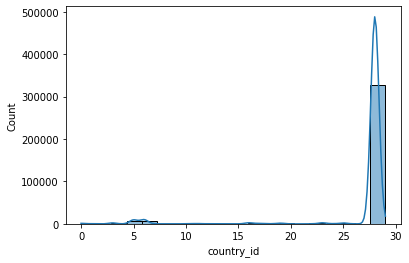

In [331]:
sns.histplot(df['country_id'], kde=True)#построим гистограмму для country_id
plt.show()

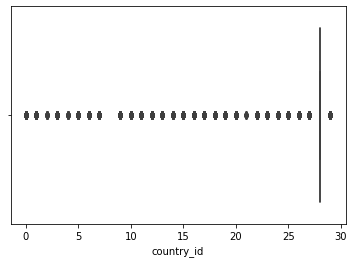

In [332]:
sns.boxplot(x = df_merge['country_id']) #построим boxplot
plt.show()

In [333]:
Q1 = df_merge['country_id'].quantile(0.25)#найдем первый квантиль
Q3 = df_merge['country_id'].quantile(0.75) #найдем третий квантиль
IQR = Q3 - Q1
print(Q1,Q3)

28.0 28.0


In [334]:
# Находим выбросы
outliers_country_id = df_merge[(df_merge['country_id'] < (Q1 - 1.5 * IQR)) | (df_merge['country_id'] > (Q3 + 1.5 * IQR))]
display(outliers_country_id)

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,entry_new,revenue_on_position,revenue
16,2018-12-01 08:45:00,3036,7417,24,375,864,1022,5,"будильник, розовый, как запеканка",будильник розовый как запеканка,351201,9000
17,2018-12-01 08:45:00,3036,7417,24,375,312,1020,5,будильник красный,будильник красный,455623,9000
18,2018-12-01 08:45:00,3036,7417,12,85,241,305,5,Лист наклеек панда и кролики,лист наклеек панда и кролики,7860,1020
19,2018-12-01 08:45:00,3036,7417,24,65,165,1680,5,лента для подарков со звездами,лента для подарков со звездами,8489,1560
20,2018-12-01 08:45:00,3036,7417,48,85,3,1969,5,надувной политический глобус,надувной политический глобус,7460,4080
...,...,...,...,...,...,...,...,...,...,...,...,...
353362,2019-12-09 12:50:00,48253,7320,12,85,556,2723,5,упаковка из 20 салфеток для космонавтов,упаковка из 20 салфеток для космонавтов,14743,1020
353363,2019-12-09 12:50:00,48253,7320,6,210,144,1246,5,детский фартук для девочки-долли,детский фартук для девочкидолли,74479,1260
353364,2019-12-09 12:50:00,48253,7320,4,415,144,1241,5,детские столовые приборы Долли девочка,детские столовые приборы долли девочка,124786,1660
353365,2019-12-09 12:50:00,48253,7320,4,415,114,2811,5,цирковой парад детских столовых приборов,цирковой парад детских столовых приборов,67852,1660


In [335]:
filtered_country_id = df_merge.query('country_id != 28') #отобразим данные с идентификационным номером стран

filtered_country_id_share = len(filtered_country_id) / len(df_merge) #посчитаем какова доля таких данных 

print(f'Доля данных с номером страны не 28:{filtered_country_id_share:.2%}')

Доля данных с номером страны не 28:9.08%


9,08% данных находятся за пределами первого и третьего квартилей. Это достаточно крупная доля, данные с идентификационным номером страны важны, оставим данные неизменными.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Категориальные данные исследованы верно)

In [336]:
# Установим столбец с датой в качестве индекса
df_merge.set_index('entry_date', inplace=True)

In [337]:
# Подсчитаем количество записей по дням
daily_counts = df_merge.resample('D').size()

In [338]:
# Подсчитаем количество дней без продаж по месяцам
no_sales_days = daily_counts.resample('M').apply(lambda x: len(x[x == 0]))
print(no_sales_days)

entry_date
2018-12-31    11
2019-01-31     7
2019-02-28     4
2019-03-31     4
2019-04-30     9
2019-05-31     6
2019-06-30     4
2019-07-31     5
2019-08-31     5
2019-09-30     4
2019-10-31     5
2019-11-30     4
2019-12-31     1
Freq: M, dtype: int64


Представлены данные за декабрь 2018 года и полностью за 12 месяцев 2019 года. В декабре 2018 года было 11 дней без продаж. Эти данные кажутся неактуальными. 

In [339]:
#отфильтруем данные за декабрь 2018 года 
df_merge = df_merge.query('entry_date > "2018-12-31"')
display(df_merge)

,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,entry_new,revenue_on_position,revenue
entry_date,,,,,,,,,,,
2019-01-04 10:00:00,6659,6687,10,195,898,958,28,большая сумка розового цвета в горошек,большая сумка розового цвета в горошек,302975,1950
2019-01-04 10:00:00,6659,6687,5,210,424,1751,28,мешок для переработки,мешок для переработки,235723,1050
2019-01-04 10:00:00,6659,6687,10,125,427,1582,28,красная сумка-шоппер Retrospot,красная сумкашоппер retrospot,100893,1250
2019-01-04 10:00:00,6659,6687,10,195,427,957,28,большая сумка красного цвета Retrospot,большая сумка красного цвета retrospot,482956,1950
2019-01-04 10:00:00,6659,6687,6,295,532,1542,28,коробка с рецептами,коробка с рецептами,138971,1770
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-09 12:50:00,48253,7320,12,85,556,2723,5,упаковка из 20 салфеток для космонавтов,упаковка из 20 салфеток для космонавтов,14743,1020
2019-12-09 12:50:00,48253,7320,6,210,144,1246,5,детский фартук для девочки-долли,детский фартук для девочкидолли,74479,1260
2019-12-09 12:50:00,48253,7320,4,415,144,1241,5,детские столовые приборы Долли девочка,детские столовые приборы долли девочка,124786,1660


In [340]:
df_merge.reset_index(inplace=True)
print(df_merge.reset_index())

         index          entry_date  order_id  customer_id  quantity  price  \
0            0 2019-01-04 10:00:00      6659         6687        10    195   
1            1 2019-01-04 10:00:00      6659         6687         5    210   
2            2 2019-01-04 10:00:00      6659         6687        10    125   
3            3 2019-01-04 10:00:00      6659         6687        10    195   
4            4 2019-01-04 10:00:00      6659         6687         6    295   
...        ...                 ...       ...          ...       ...    ...   
239077  239077 2019-12-09 12:50:00     48253         7320        12     85   
239078  239078 2019-12-09 12:50:00     48253         7320         6    210   
239079  239079 2019-12-09 12:50:00     48253         7320         4    415   
239080  239080 2019-12-09 12:50:00     48253         7320         4    415   
239081  239081 2019-12-09 12:50:00     48253         7320         3    495   

        name_clust  entry_id  country_id  \
0              898 

In [341]:
display(df_merge.columns)

Index(['entry_date', 'order_id', 'customer_id', 'quantity', 'price',
       'name_clust', 'entry_id', 'country_id', 'entry', 'entry_new',
       'revenue_on_position', 'revenue'],
      dtype='object')

В результате предобработки были обработаны столбцы датафреймов. Датафреймы объединены в один общий датафрейм. Были изучены значения в столбцах, приведены типы данных, устранены дубликаты и пропуски. Отфильтрованы аномалии и устранены некорректные значения. 

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Временной интервал выбран правильно

# Шаг 3. Расчёт метрик

In [342]:
display(df_merge['entry_date']) #выведем данные столбца entry_date

0        2019-01-04 10:00:00
1        2019-01-04 10:00:00
2        2019-01-04 10:00:00
3        2019-01-04 10:00:00
4        2019-01-04 10:00:00
                 ...        
239077   2019-12-09 12:50:00
239078   2019-12-09 12:50:00
239079   2019-12-09 12:50:00
239080   2019-12-09 12:50:00
239081   2019-12-09 12:50:00
Name: entry_date, Length: 239082, dtype: datetime64[ns]

In [343]:
# Оценим количество заказов и уникальных покупателей по часам и дням недели (создадим столбцы hour и day_of_week)
df_merge_new = df_merge.copy()
df_merge_new['hour'] = df_merge_new['entry_date'].dt.hour
df_merge_new['day_of_week'] = df_merge_new['entry_date'].dt.day_name()

In [344]:
#посчитаем количество заказов по часам и дням недели 
orders_by_hour_day = df_merge_new.groupby(['hour', 'day_of_week'])['order_id'].count()
display(orders_by_hour_day)

hour  day_of_week
6     Sunday            1
7     Friday           43
      Monday           62
      Saturday         31
      Sunday           18
                     ... 
19    Saturday          3
      Sunday         1769
20    Monday            5
      Saturday          1
      Sunday          472
Name: order_id, Length: 73, dtype: int64

In [345]:
#посчитаем количество заказов по часам
orders_by_hour = df_merge_new.groupby(['hour'])['order_id'].count()
display(orders_by_hour)

hour
6         1
7       167
8      5145
9     13197
10    22228
11    29291
12    43229
13    38827
14    32747
15    27751
16    14501
17     7963
18     1723
19     1834
20      478
Name: order_id, dtype: int64

Больше всего заказов сделано в с 11:00 до 15:00.

In [346]:
#посчитаем количество заказов по дням недели 
orders_by_day = df_merge_new.groupby(['day_of_week'])['order_id'].count()
display(orders_by_day)

day_of_week
Friday       40753
Monday       33224
Saturday     40547
Sunday       47659
Thursday     39087
Wednesday    37812
Name: order_id, dtype: int64

Больше всего закащов сделано в воскресенье, пятницу, субботу.

In [347]:
#посчитаем количество уникальных покупателей по часам и дням недели 
unique_buyers_by_hour_day = df_merge_new.groupby(['hour', 'day_of_week'])['customer_id'].nunique()
print(unique_buyers_by_hour_day)

hour  day_of_week
6     Sunday          1
7     Friday          5
      Monday          4
      Saturday        4
      Sunday          5
                     ..
19    Saturday        1
      Sunday         83
20    Monday          1
      Saturday        1
      Sunday         14
Name: customer_id, Length: 73, dtype: int64


In [348]:
unique_buyers_by_hour = df_merge_new.groupby(['hour'])['customer_id'].nunique()
print(unique_buyers_by_hour)

hour
6        1
7       20
8      388
9      802
10    1126
11    1172
12    1480
13    1426
14    1255
15    1151
16     672
17     357
18     117
19      83
20      15
Name: customer_id, dtype: int64


Больше всего посетителей было с 10:00 до 15:00.

In [349]:
unique_buyers_by_day = df_merge_new.groupby(['day_of_week'])['customer_id'].nunique()
print(unique_buyers_by_day)

day_of_week
Friday       1580
Monday       1433
Saturday     1572
Sunday       1811
Thursday     1458
Wednesday    1145
Name: customer_id, dtype: int64


Больше всего посетителей было в воскресенье, пятницу, субботу.

In [350]:
display(df_merge_new)

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,entry_new,revenue_on_position,revenue,hour,day_of_week
0,2019-01-04 10:00:00,6659,6687,10,195,898,958,28,большая сумка розового цвета в горошек,большая сумка розового цвета в горошек,302975,1950,10,Friday
1,2019-01-04 10:00:00,6659,6687,5,210,424,1751,28,мешок для переработки,мешок для переработки,235723,1050,10,Friday
2,2019-01-04 10:00:00,6659,6687,10,125,427,1582,28,красная сумка-шоппер Retrospot,красная сумкашоппер retrospot,100893,1250,10,Friday
3,2019-01-04 10:00:00,6659,6687,10,195,427,957,28,большая сумка красного цвета Retrospot,большая сумка красного цвета retrospot,482956,1950,10,Friday
4,2019-01-04 10:00:00,6659,6687,6,295,532,1542,28,коробка с рецептами,коробка с рецептами,138971,1770,10,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239077,2019-12-09 12:50:00,48253,7320,12,85,556,2723,5,упаковка из 20 салфеток для космонавтов,упаковка из 20 салфеток для космонавтов,14743,1020,12,Monday
239078,2019-12-09 12:50:00,48253,7320,6,210,144,1246,5,детский фартук для девочки-долли,детский фартук для девочкидолли,74479,1260,12,Monday
239079,2019-12-09 12:50:00,48253,7320,4,415,144,1241,5,детские столовые приборы Долли девочка,детские столовые приборы долли девочка,124786,1660,12,Monday
239080,2019-12-09 12:50:00,48253,7320,4,415,114,2811,5,цирковой парад детских столовых приборов,цирковой парад детских столовых приборов,67852,1660,12,Monday


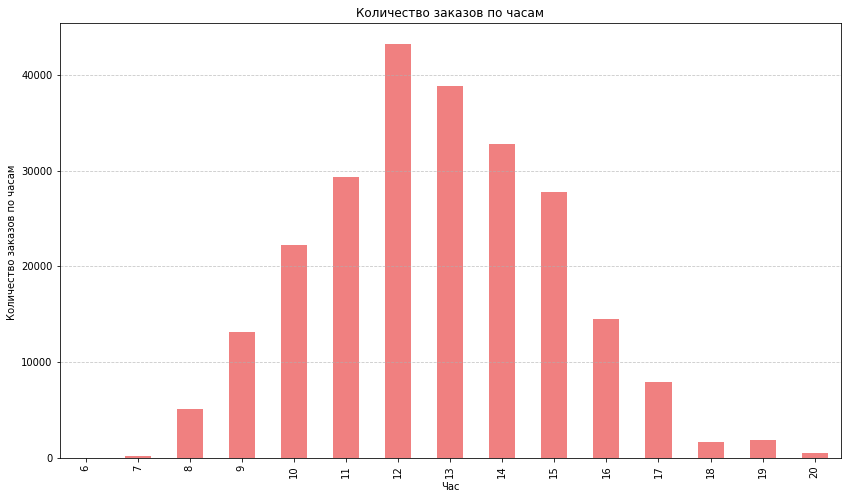

In [351]:
# Создание столбчатой диаграммы по часам
plt.figure(figsize=(14, 8))
orders_by_hour.plot(kind='bar', color='lightcoral')
plt.xlabel('Час')
plt.ylabel('Количество заказов по часам ')
plt.title('Количество заказов по часам')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Большая часть заказов сделана с 11:00 до 15:00.

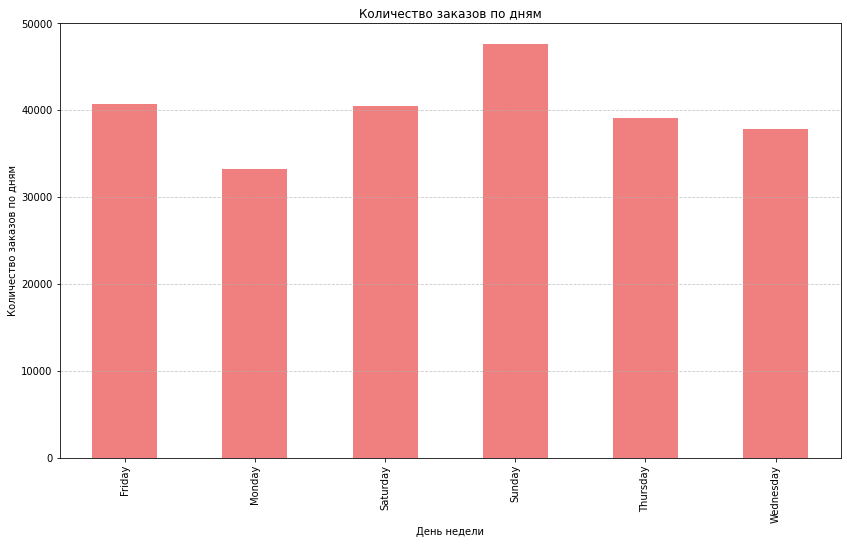

In [352]:
# Создание столбчатой диаграммы по часам
plt.figure(figsize=(14, 8))
orders_by_day.plot(kind='bar', color='lightcoral')
plt.xlabel('День недели')
plt.ylabel('Количество заказов по дням')
plt.title('Количество заказов по дням')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Большая часть заказов совершена в пятницу, субботу, воскресенье.

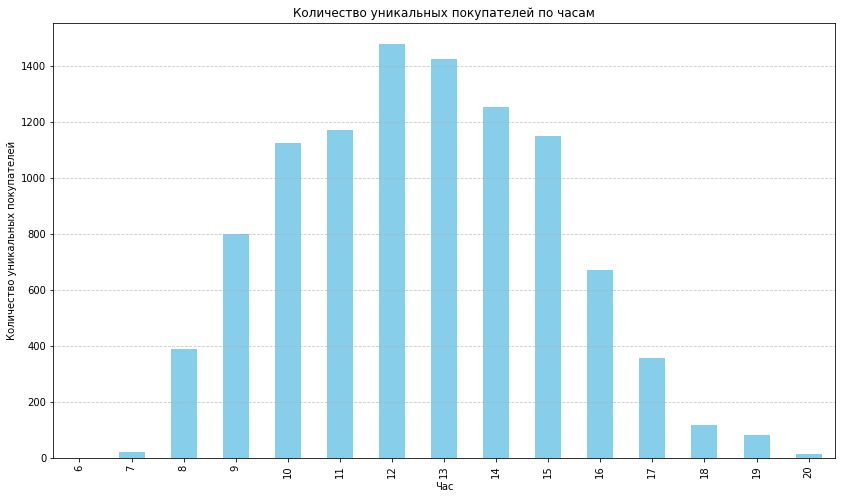

In [353]:
# Создание столбчатой диаграммы по часам
plt.figure(figsize=(14, 8))
unique_buyers_by_hour.plot(kind='bar', color='skyblue')
plt.xlabel('Час')
plt.ylabel('Количество уникальных покупателей')
plt.title('Количество уникальных покупателей по часам')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Больше всего посетителей было с 10:00 до 15:00.

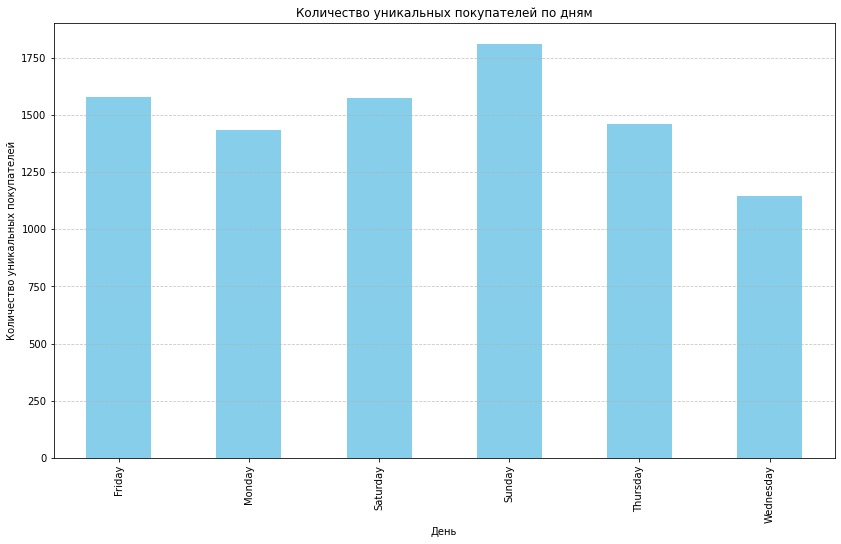

In [354]:
# Создание столбчатой диаграммы по часам
plt.figure(figsize=(14, 8))
unique_buyers_by_day.plot(kind='bar', color='skyblue')
plt.xlabel('День')
plt.ylabel('Количество уникальных покупателей')
plt.title('Количество уникальных покупателей по дням')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Больше всего посетителей было в воскресенье, пятницу и субботу. 

Самое большое количество покупателей и сделанных заказов отмечается в пятницу, субботу и воскресенье в обеденное время с 11:00 до 15:00. 

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Даа, хорошо

In [355]:
# рассчитаем среднюю выручку по клиентам
print(df_merge_new.groupby(['customer_id'])['revenue'].mean()) 

customer_id
1713    2729.148936
1717     261.823843
1718    1485.750000
1719    1154.571429
1720    1898.571429
           ...     
7647    2225.000000
7648    1793.250000
7650    1723.333333
7651    1982.923077
7653    2366.538462
Name: revenue, Length: 4083, dtype: float64


<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Молодец!

In [356]:
#рассчитаем среднюю выручку с клиента в день
avg_revenue_per_day_per_client = df_merge_new.groupby(['day_of_week', 'customer_id'])['revenue'].mean().reset_index()
avg_revenue_per_day_per_client = avg_revenue_per_day_per_client.groupby('day_of_week')['revenue'].mean()
print(f'Средняя выручка с клиента в день: {avg_revenue_per_day_per_client.mean():.2f}')

Средняя выручка с клиента в день: 2364.22


In [357]:
#рассчитаем среднюю выручку в месяц
df_merge_new['month'] = df_merge_new['entry_date'].dt.month  
avg_revenue_by_month = df_merge_new.groupby(df_merge_new['entry_date'].dt.month)['revenue'].mean()
print("Средняя выручка по месяцам:")
print(avg_revenue_by_month)

Средняя выручка по месяцам:
entry_date
1     1726.683536
2     1782.333836
3     1638.899935
4     1598.002697
5     1815.447531
6     1667.991217
7     1621.417404
8     1720.523991
9     1713.431583
10    1511.753889
11    1423.521127
12    1481.109106
Name: revenue, dtype: float64


Самый высокий показатель выручки в мае, феврале, январе, августе и сентябре.

In [358]:
#рассчитаем количество уникальных покупателей по месяцам
unique_buyers_by_month = df_merge_new.groupby('month')['customer_id'].nunique()
print("Количество уникальных покупателей по месяцам:")
print(unique_buyers_by_month)

Количество уникальных покупателей по месяцам:
month
1      709
2      719
3      930
4      817
5     1023
6      948
7      910
8      894
9     1215
10    1313
11    1606
12     589
Name: customer_id, dtype: int64


Больше всего покупателей осенью, с сентября по ноябрь (сезон). 

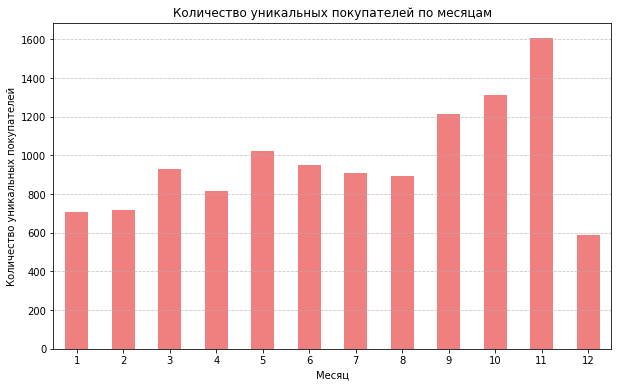

In [359]:
plt.figure(figsize=(10, 6))
unique_buyers_by_month.plot(kind='bar', color='lightcoral')
plt.xlabel('Месяц')
plt.ylabel('Количество уникальных покупателей')
plt.title('Количество уникальных покупателей по месяцам')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Больше всего посетителей в магазине было в сентябре, октябре, ноябре. Можно определить сезонность (осень).

In [360]:
# Рассчитаем стик-фактор за второй квартал 2019 года
q2_start = '2019-04-01'
q2_end = '2019-06-30'
q2_unique_buyers = df_merge[(df_merge['entry_date'] >= q2_start) & (df_merge['entry_date'] <= q2_end)]['customer_id'].nunique()
q2_stick_factor = q2_unique_buyers / df_merge[(df_merge['entry_date'] < q2_start)]['customer_id'].nunique()

In [361]:
#Рассчитаем стик-фактор за третий квартал 2019 года
q3_start = '2019-07-01'
q3_end = '2019-09-30'
q3_unique_buyers = df_merge[(df_merge['entry_date'] >= q3_start) & (df_merge['entry_date'] <= q3_end)]['customer_id'].nunique()
q3_stick_factor = q3_unique_buyers / q2_unique_buyers

In [362]:
print(f'Стик-фактор за второй квартал 2019 года:{q2_stick_factor:.2%}')
print(f'Стик-фактор за третий квартал 2019 года:{q3_stick_factor:.2%}')

Стик-фактор за второй квартал 2019 года:112.12%
Стик-фактор за третий квартал 2019 года:107.87%


<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Стики-фактор рассчитан верно!

Можно сделать вывод, что стик-фактор (или коэффициент удержания) для второго квартала 2019 года составляет 112.12%, а для третьего квартала 2019 года он снизился до 107.87%. Это означает, что во втором квартале компания удерживала больший процент клиентов по сравнению с третьим кварталом. Такой вывод может свидетельствовать о том, что стратегии удержания клиентов или уровень loyality могли измениться за это время, необходимо проанализировать и возможно усовершенствовать данную стратегию. Также это может быть индикатором изменений в предпочтениях или поведении клиентов в отношении продуктов или услуг компании. Необходимо проанализировать возможность изменений в предпочтениях клиентов. Вероятно, могли появиться новые инновационные заменители.

In [363]:
profiles = (
    df_merge_new.sort_values(by=['customer_id', 'entry_date'])# Сортируем данные по id пользователя и времени события
            .groupby('customer_id') # Группируем данные по пользователю
            .agg(# проводим необходимую агрегацию
                count_order=('order_id', 'count'),
                first_order_date=('entry_date', 'first'),
                last_order_date=('entry_date', 'last'),
                total_revenue=('revenue', 'sum'),
                avg_price=('price', 'mean'),
                max_price=('price', 'max'),
                min_price=('price', 'min')
            )
            .reset_index()# Сбрасываем индекс
)
display(profiles)

,customer_id,count_order,first_order_date,last_order_date,total_revenue,avg_price,max_price,min_price
0,1713,47,2019-05-22 10:39:00,2019-10-28 09:29:00,128270,165.489362,850,29
1,1717,562,2019-01-06 14:14:00,2019-12-06 12:02:00,147145,153.653025,1595,29
2,1718,8,2019-08-05 13:35:00,2019-12-02 11:43:00,11886,645.125000,1275,29
3,1719,7,2019-06-12 10:53:00,2019-06-12 10:53:00,8082,562.285714,1695,42
4,1720,7,2019-03-07 09:52:00,2019-03-07 09:52:00,13290,471.428571,995,255
...,...,...,...,...,...,...,...,...
4078,7647,4,2019-05-19 17:47:00,2019-05-19 17:47:00,8900,607.500000,995,145
4079,7648,52,2019-02-16 12:33:00,2019-11-03 14:37:00,93249,427.134615,1275,65
4080,7650,12,2019-02-02 16:01:00,2019-02-02 16:01:00,20680,150.000000,295,85
4081,7651,52,2019-11-21 09:51:00,2019-11-21 09:51:00,103112,345.807692,1595,42


In [364]:
# Разделим клиентов на возвратных и нет
returning_customers = profiles[profiles['count_order'] > 1]
non_returning_customers = profiles[profiles['count_order'] == 1]
display(returning_customers)
display(non_returning_customers)

,customer_id,count_order,first_order_date,last_order_date,total_revenue,avg_price,max_price,min_price
0,1713,47,2019-05-22 10:39:00,2019-10-28 09:29:00,128270,165.489362,850,29
1,1717,562,2019-01-06 14:14:00,2019-12-06 12:02:00,147145,153.653025,1595,29
2,1718,8,2019-08-05 13:35:00,2019-12-02 11:43:00,11886,645.125000,1275,29
3,1719,7,2019-06-12 10:53:00,2019-06-12 10:53:00,8082,562.285714,1695,42
4,1720,7,2019-03-07 09:52:00,2019-03-07 09:52:00,13290,471.428571,995,255
...,...,...,...,...,...,...,...,...
4078,7647,4,2019-05-19 17:47:00,2019-05-19 17:47:00,8900,607.500000,995,145
4079,7648,52,2019-02-16 12:33:00,2019-11-03 14:37:00,93249,427.134615,1275,65
4080,7650,12,2019-02-02 16:01:00,2019-02-02 16:01:00,20680,150.000000,295,85
4081,7651,52,2019-11-21 09:51:00,2019-11-21 09:51:00,103112,345.807692,1595,42


,customer_id,count_order,first_order_date,last_order_date,total_revenue,avg_price,max_price,min_price
21,1749,1,2019-09-13 15:03:00,2019-09-13 15:03:00,30600,425.0,425,425
70,1816,1,2019-11-24 15:28:00,2019-11-24 15:28:00,4980,83.0,83,83
77,1826,1,2019-12-02 16:56:00,2019-12-02 16:56:00,10400,208.0,208,208
149,1932,1,2019-02-23 14:50:00,2019-02-23 14:50:00,10170,1695.0,1695,1695
157,1942,1,2019-11-30 08:38:00,2019-11-30 08:38:00,696,29.0,29,29
...,...,...,...,...,...,...,...,...
3750,7186,1,2019-08-30 12:11:00,2019-08-30 12:11:00,8592,179.0,179,179
3756,7202,1,2019-06-22 10:11:00,2019-06-22 10:11:00,6912,72.0,72,72
3775,7237,1,2019-07-24 14:12:00,2019-07-24 14:12:00,8700,145.0,145,145
4019,7555,1,2019-11-17 18:43:00,2019-11-17 18:43:00,1740,145.0,145,145


In [365]:
# Рассчитаем средние показатели для возвратных клиентов
returning_avg_count_orders = returning_customers['count_order'].mean()
returning_avg_price = returning_customers['avg_price'].mean()
returning_total_revenue = returning_customers['total_revenue'].mean()
print("Среднее количество заказов для возвратных клиентов:")
print(returning_avg_count_orders.round(2))
print("Средняя цена заказа для возвратных клиентов:")
print(returning_avg_price.round(2))
print("Средняя выручка для возвратных клиентов:")
print(returning_total_revenue.round(3))

Среднее количество заказов для возвратных клиентов:
59.85
Средняя цена заказа для возвратных клиентов:
298.0
Средняя выручка для возвратных клиентов:
96571.158


In [366]:
# Рассчитаем средние показатели для невозвратных клиентов
non_returning_avg_count_orders = non_returning_customers['count_order'].mean()
non_returning_avg_price = non_returning_customers['avg_price'].mean()
non_returning_total_revenue = non_returning_customers['total_revenue'].mean()
print("Среднее количество заказов для невозвратных клиентов:")
print(non_returning_avg_count_orders.round(2))
print("Средняя цена заказа для невозвратных клиентов:")
print(non_returning_avg_price.round(2))
print("Средняя выручка для невозвратных клиентов:")
print(non_returning_total_revenue.round(3))

Среднее количество заказов для невозвратных клиентов:
1.0
Средняя цена заказа для невозвратных клиентов:
469.46
Средняя выручка для невозвратных клиентов:
8349.367


In [367]:
#найдем во сколько раз средняя выручка для возвратных клиентов больше, чем для невозвратных клиентов 
revenue_difference  = returning_total_revenue/ non_returning_total_revenue
print(revenue_difference)

11.566285430018219


In [368]:
#найдем во сколько раз средняя цена для возвратных клиентов отличается от средней цены для невозвратных клиентов 
price_difference = returning_avg_price/non_returning_avg_price
print(price_difference)

0.6347756169077959


Средняя цена заказа у возвратных пользователей ниже, чем у невозвратных ( в 0,635 раза). Однако, средняя выручка для возвратных клиентов гораздо больше ( в 11.59 раз), чем для невозвратных.

В шаге 3 были проанализированны по часам и дням недели количество заказов и количество уникальных покупателей. Построены графики.  Больше всего совершалось заказов воскресенье, пятницу и субботу. Большая часть заказов была совершена в обеденное время с 11:00 до 15:30. Самое большое количество покупателей отмечается в пятницу, субботу и воскресенье в обеденное время с 11:30 до 14:30.

Рассчитана по месяцам средняя выручка с клиента в день и количество уникальных покупателей. Средняя выручка с клиента в день: 2364. Самый высокий показатель выручки в мае, феврале, январе, августе и сентябре. Выявлена сезонность: больше всего покупателей осенью, с сентября по ноябрь. 

Рассчитаны стики-фактор за второй и третий квартал 2019 года. Можно сделать вывод, что стик-фактор (или коэффициент удержания) для второго квартала 2019 года составляет 112.12%, а для третьего квартала 2019 года он снизился до 107.87%. Это означает, что во втором квартале компания удерживала больший процент клиентов по сравнению с третьим кварталом. Такой вывод может свидетельствовать о том, что стратегии удержания клиентов или уровень loyality могли измениться за это время, необходимо проанализировать и возможно усовершенствовать данную стратегию. Также это может быть индикатором изменений в предпочтениях или поведении клиентов в отношении продуктов или услуг компании. Необходимо проанализировать возможность изменений в предпочтениях клиентов. Вероятно, могли появиться новые инновационные заменители.

Составлен профиль каждого клиента. 

Клиенты разделены на возвратных и нет по признаку наличия повторных покупок. Для каждой из групп на основе профилей клиентов рассчитаны средние показатели. Средняя цена заказа у возвратных пользователей ниже, чем у невозвратных ( в 0,635 раза). Однако, средняя выручка для возвратных клиентов гораздо больше ( в 11.59 раз), чем для невозвратных.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Профили и возвратные пользователи составлены и проанализированы верно

# Шаг 4. Проведем RFM-сегментацию клиентов

In [369]:
# Рассчитаем количество дней с момента покупки до момента анализа и поместим эти данные в новый столбец order_recency :
df_merge_new['order_recency'] = pd.to_datetime('2024-07-01') - df_merge_new['entry_date']
print(df_merge_new['order_recency'])

0        2004 days 14:00:00
1        2004 days 14:00:00
2        2004 days 14:00:00
3        2004 days 14:00:00
4        2004 days 14:00:00
                ...        
239077   1665 days 11:10:00
239078   1665 days 11:10:00
239079   1665 days 11:10:00
239080   1665 days 11:10:00
239081   1665 days 11:10:00
Name: order_recency, Length: 239082, dtype: timedelta64[ns]


In [370]:
# Выведем на экран первые строки таблицы:
display(df_merge_new.head()) 

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,entry_new,revenue_on_position,revenue,hour,day_of_week,month,order_recency
0,2019-01-04 10:00:00,6659,6687,10,195,898,958,28,большая сумка розового цвета в горошек,большая сумка розового цвета в горошек,302975,1950,10,Friday,1,2004 days 14:00:00
1,2019-01-04 10:00:00,6659,6687,5,210,424,1751,28,мешок для переработки,мешок для переработки,235723,1050,10,Friday,1,2004 days 14:00:00
2,2019-01-04 10:00:00,6659,6687,10,125,427,1582,28,красная сумка-шоппер Retrospot,красная сумкашоппер retrospot,100893,1250,10,Friday,1,2004 days 14:00:00
3,2019-01-04 10:00:00,6659,6687,10,195,427,957,28,большая сумка красного цвета Retrospot,большая сумка красного цвета retrospot,482956,1950,10,Friday,1,2004 days 14:00:00
4,2019-01-04 10:00:00,6659,6687,6,295,532,1542,28,коробка с рецептами,коробка с рецептами,138971,1770,10,Friday,1,2004 days 14:00:00


In [371]:
# Сгруппируем данные для каждого пользователя и рассчитаем данные для RMF анализа:
rfm = df_merge_new.groupby('customer_id').agg(
    
    # Количество дней с последнего заказа:    
    recency = ('order_recency', lambda x: x.min().days),# Recency
    # Количество заказов за период времени: 
    frequency = ('order_id', 'nunique'),# Frequency
    # Сумма стоимости всех заказов: 
    monetary_value = ('revenue', 'sum')# Monetary Value
    
).reset_index()
display(rfm)

,customer_id,recency,frequency,monetary_value
0,1713,1707,3,128270
1,1717,1668,14,147145
2,1718,1672,2,11886
3,1719,1845,1,8082
4,1720,1942,1,13290
...,...,...,...,...
4078,7647,1869,1,8900
4079,7648,1701,7,93249
4080,7650,1975,1,20680
4081,7651,1683,1,103112


In [372]:
# Выделим группу пользователя по количеству дней с момента последнего заказа: 
rfm['r']= pd.qcut(rfm['recency'], q=3, labels=[3,2,1])
# Выведем на экран первые строки таблицы:
display(rfm.head())

,customer_id,recency,frequency,monetary_value,r
0,1713,1707,3,128270,2
1,1717,1668,14,147145,3
2,1718,1672,2,11886,3
3,1719,1845,1,8082,1
4,1720,1942,1,13290,1


In [373]:
# Вычисляем квантили для столбца frequency
quantiles = rfm['frequency'].quantile([0.33, 0.66])
# Разделяем группы пользователей по количеству заказов
rfm['f'] = pd.cut(rfm['frequency'], [0, quantiles.iloc[0], quantiles.iloc[1], float('inf')], labels=[1, 2, 3])
# Выведем на экран первые строки таблицы:
display(rfm.head()) 

,customer_id,recency,frequency,monetary_value,r,f
0,1713,1707,3,128270,2,2
1,1717,1668,14,147145,3,3
2,1718,1672,2,11886,3,2
3,1719,1845,1,8082,1,1
4,1720,1942,1,13290,1,1


In [374]:
# Выделим группу пользователя по сумме стоимости заказов: 
rfm['m'] = pd.qcut(rfm['monetary_value'], q=3, labels=[1,2,3])
# Выведем на экран первые строки таблицы:
display(rfm.head()) 

,customer_id,recency,frequency,monetary_value,r,f,m
0,1713,1707,3,128270,2,2,3
1,1717,1668,14,147145,3,3,3
2,1718,1672,2,11886,3,2,1
3,1719,1845,1,8082,1,1,1
4,1720,1942,1,13290,1,1,1


In [375]:
# Найдем групповой RFM индекс:
rfm[['r','f','m']] = rfm[['r','f','m']].astype('str')
rfm['rfm_group'] = rfm['r'] + rfm['f'] + rfm['m'] 
display(rfm.head())

,customer_id,recency,frequency,monetary_value,r,f,m,rfm_group
0,1713,1707,3,128270,2,2,3,223
1,1717,1668,14,147145,3,3,3,333
2,1718,1672,2,11886,3,2,1,321
3,1719,1845,1,8082,1,1,1,111
4,1720,1942,1,13290,1,1,1,111


In [376]:
# Найдем сумму индексов RFM:
rfm[['r','f','m']] = rfm[['r','f','m']].astype('int')
rfm['rfm_sum'] = rfm[['r','f','m']].sum(axis=1)
display(rfm.head())

,customer_id,recency,frequency,monetary_value,r,f,m,rfm_group,rfm_sum
0,1713,1707,3,128270,2,2,3,223,7
1,1717,1668,14,147145,3,3,3,333,9
2,1718,1672,2,11886,3,2,1,321,6
3,1719,1845,1,8082,1,1,1,111,3
4,1720,1942,1,13290,1,1,1,111,3


In [377]:
# Сгруппируем данные по сегментам и подсчитаем их размер и сумму индексов:
rfm_group = rfm.groupby('rfm_group').agg({'customer_id':'nunique',
                                          'rfm_sum':'mean'}).reset_index()
display(rfm_group)

,rfm_group,customer_id,rfm_sum
0,111,598,3
1,112,214,4
2,113,25,5
3,121,121,4
4,122,209,5
5,123,77,6
6,131,10,5
7,132,39,6
8,133,64,7
9,211,312,4


In [378]:
# Выведем на экран результат:
display(rfm_group.sort_values(by='customer_id', ascending=False)) 

,rfm_group,customer_id,rfm_sum
26,333,678,9
0,111,598,3
17,233,318,8
9,211,312,4
13,222,263,6
22,322,222,7
1,112,214,4
4,122,209,5
10,212,150,5
18,311,135,5


In [1]:
# Импортируем необходимые библиотеки:
import plotly.express as px

# Построим график treemap для визуализации результатов RFM сегментации:
fig = px.treemap(rfm_group, 
                 path=['rfm_group'], # Выбираем RFM-сегменты 
                 values='customer_id', # Устанавливаем размер - количество покупателей
                 color='rfm_sum', # Цвет сегмента будет определять сумма RFM 
                 color_continuous_scale='Sunset',
                 title='RFM сегментация покупателей интернет-магазина "Подарочек"')

# Отобразим график:
fig.show() 

NameError: name 'rfm_group' is not defined

Можно выделить несколько наиболее активных сегментов: 333, 111, 233, 211, 222, 322, 112. Сегменты свидетельствует о том, что большинство пользователей совершали покупки относительно недавно и относительно часто и потратили достаточно много. 

333: «Золотой сегмент». Необходимо предпринять действия по удержанию: программы лояльности, индивидуальное обслуживание.Такие клиенты самые выгодные для компании.

332: также, очень выгодный сегмент, стратегия - удержание покупателей. Предложения скидок и программ лояльности.

111: Этот сегмент включает клиентов с низкими значениями RFM. Возможно, это новые клиенты или клиенты, которые совершили только одну покупку. Стоит увеличить частоту покупок и средний чек.Для этого сегмента можно разработать программы лояльности, скидки за объём покупок или программы привлечения новых клиентов.  

Сегменты 211, 212, 213: Эти сегменты включают клиентов средней активности и малой частоты покупок. Для них можно предложить персонализированные рекомендации, бонусные программы или скидки для увеличения их лояльности.

Сегменты 311, 312, 313: Эти сегменты включают клиентов с высокой частотой покупок, но меньшей суммой покупок. Для них можно предложить кросс-продажи, увеличение среднего чека или участие в программе лояльности для стимулирования дополнительных покупок.

Сегменты 231, 232, 233: Эти сегменты включают клиентов с высокими значениями RFM. Они являются самыми ценными клиентами. Для них важно поддерживать высокий уровень обслуживания, предлагать эксклюзивные предложения и персонализированный сервис.

322, 222: Стабильные сегменты. Необходимо предпринять действия по удержанию: программы лояльности, индивидуальное обслуживание.

112, 121: Доходность на среднем уровне, но покупали давно и нечасто. Стоит применить стратегию реактивации — возвращающие письма, акции, промокоды.

323, , 332, 223:	Выгодные сегменты. Необходимо предпринять действия по удержанию: программы лояльности, индивидуальное обслуживание.

312, 313:	Нужно увеличить частоту покупок. Стратегия — акции и скидки за регулярность покупок.

123	Клиенты покупали достаточно давно, но на большую сумму и со средней частотой. Стратегия — реактивация: возвращающие письма, акции, промокоды.

113	Клиенты покупали достаточно давно и нечасто, но на большую сумму. Стратегия — реактивация: возвращающие письма, акции, промокоды.

133	Клиенты покупали достаточно давно, но часто и на большую сумму. Стратегия — реактивация: возвращающие письма, акции, промокоды.

122	Клиенты покупали достаточно давно, но доходность и частота на среднем уровне. Стратегия — реактивация: возвращающие письма, акции, промокоды.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Сегментация проведена правильно, выводы релевантны

# Шаг 5. Проверим статистические гипотезы

In [380]:
from statsmodels.stats.proportion import proportions_ztest

#Н0:Доли возвратных клиентов статистически не значимо различаются между вторым и третьим кварталами.
#Н1:Доли возвратных клиентов статистически значимо различаются между вторым и третьим кварталами.

# Определение дат для второго и третьего квартала 2019 года
q2_start = '2019-04-01'
q2_end = '2019-06-30'
q3_start = '2019-07-01'
q3_end = '2019-09-30'

# Фильтрация данных для второго и третьего квартала
q2 = df_merge_new[(df_merge_new['entry_date'] >= q2_start) & (df_merge_new['entry_date'] <= q2_end)]
q3 = df_merge_new[(df_merge_new['entry_date'] >= q3_start) & (df_merge_new['entry_date'] <= q3_end)]

# Вычисление количества возвратных клиентов для каждого квартала
returns_q2 = profiles['count_order'] > 1 # Предположим, что count_order > 1 означает возвратного клиента
returns_q3 = profiles['count_order'] > 1

# Вычисление общего количества клиентов для каждого квартала
total_q2 = len(q2)
total_q3 = len(q3)

# Вычисление долей возвратных клиентов
proportion_returns_q2 = len(returns_q2) / total_q2
proportion_returns_q3 = len(returns_q3) / total_q3

# Применение z-теста для сравнения долей
z_stat, pval = proportions_ztest([len(returns_q2), len(returns_q3)], [total_q2, total_q3])
alpha = 0.05

print(z_stat, pval)

if pval <= alpha:
    print("Доли возвратных клиентов статистически значимо различаются между вторым и третьим кварталами.")
else:
    print("Доли возвратных клиентов не различаются статистически значимо между вторым и третьим кварталами.")

8.042664721832484 8.790560304610229e-16
Доли возвратных клиентов статистически значимо различаются между вторым и третьим кварталами.


In [381]:
#Н0: Доли невозвратных клиентов статистически не значимо различаются между вторым и третьим кварталами.
#Н1: Доли невозвратных клиентов статистически значимо различаются между вторым и третьим кварталами.
    
# Вычисление количества невозвратных клиентов для каждого квартала
non_returns_q2 = profiles['count_order'] == 1 # Предположим, что count_order == 1 означает невозвратного клиента
non_returns_q3 = profiles['count_order'] == 1

# Вычисление долей невозвратных клиентов
proportion_non_returns_q2 = len(non_returns_q2) / total_q2
proportion_non_returns_q3 = len(non_returns_q3) / total_q3

# Применение z-теста для сравнения долей
z_stat, pval = proportions_ztest([len(non_returns_q2), len(non_returns_q3)], [total_q2, total_q3])
alpha = 0.05

print(z_stat, pval)

if pval <= alpha:
    print("Доли невозвратных клиентов статистически значимо различаются между вторым и третьим кварталами.")
else:
    print("Доли невозвратных клиентов не различаются статистически между вторым и третьим кварталами.")

8.042664721832484 8.790560304610229e-16
Доли невозвратных клиентов статистически значимо различаются между вторым и третьим кварталами.


In [382]:
#Н0:Доли возвратных и невозратных клиентов статистически не значимо различаются между вторым и третьим кварталами.
#Н1:Доли возвратных и невозратных клиентов статистически значимо различаются между вторым и третьим кварталами.
    
# Фильтрация данных за второй и третий кварталы
q2_3 = df_merge_new[(df_merge_new['entry_date'] >= q2_start) & (df_merge_new['entry_date'] <= q3_end)]

returns = profiles['count_order'] > 1 # Предположим, что count_order > 1 означает возвратного клиента
non_returns = profiles['count_order'] == 1 # Предположим, что count_order == 1 означает невозвратного клиента

total_q2_3 = len(q2_3)

# Вычисление долей возвратных и невозвратных клиентов
proportion_returns = len(returns) / total_q2_3
proportion_non_returns = len(non_returns) / total_q2_3

# Применение z-теста для сравнения долей
z_stat, pval = proportions_ztest([len(returns), len(non_returns)], [total_q2_3, total_q2_3])
alpha = 0.05

print(f"Z-статистика: {z_stat}")
print(f"p-значение: {pval}")

Z-статистика: 0.0
p-значение: 1.0


Z-статистика равна 0.0. Значение Z-статистики показывает, насколько отклонение между наблюдаемой разностью долей и ожидаемой разностью долей выражено в стандартных ошибках. В данном случае Z-статистика равна нулю, что может указывать на то, что различия между долями в данных незначительны.

p-значение равно 1.0. P-значение представляет собой вероятность получить такие же или более экстремальные результаты, если нулевая гипотеза верна. В данном случае p-значение равно 1.0, что означает, что при условии верности нулевой гипотезы вероятность получить такие же или более экстремальные результаты очень высока.

Таким образом, Z-статистика 0.0 и p-значение 1.0 указывают на отсутствие статистически значимых различий между долями возвратных клиентов во втором и третьем кварталах.

In [393]:
# Сравнение средних чеков в странах с country_id 3, 6 и 24
# Применение однофакторного анализа 
#Н0: Средние чеки стран 3, 6 и 24 статистически не значимо отличаются.
#Н1: Средние чеки стран 3, 6 и 24 статистически значимо отличаются. 

from scipy.stats import f_oneway

country_3 = df_merge_new[df_merge_new['country_id'] == 3]['revenue'] #средний чек страны 3
country_6 = df_merge_new[df_merge_new['country_id'] == 6]['revenue'] #средний чек страны 6
country_24 = df_merge_new[df_merge_new['country_id'] == 24]['revenue'] #средний чек страны 24

f_stat, p_val = f_oneway(country_3, country_6, country_24)
print(f_stat, p_val)

87.40489690120945 2.845192774851605e-38


Так как p_val значительно меньше alpha, то можно прийти к выводу, что есть статистически значимое различие между средними чеками стран. Поэтому отклоняем нулевую гипотезу о том, что нет различий в средних чеках.

In [387]:
# Формулирование и проверка собственной гипотезы
from scipy.stats import ttest_ind

#гипотеза: Средняя выручка от клиентов второго и третьего квартала имеют статистически значимую разницу
#Н0: Средняя выручка второго квартала статистически значимо не отличается от  средней выручки третьего квартала. 
#Н1: Средняя выручка второго квартала статистически значимо отличается от  средней выручки третьего квартала. 
revenue_q2 = df_merge_new[(df_merge_new['entry_date'] >= q2_start) & (df_merge_new['entry_date'] <= q2_end)]['revenue']
revenue_q3 = df_merge_new[(df_merge_new['entry_date'] >= q3_start) & (df_merge_new['entry_date'] <= q3_end)]['revenue']

# Проведем t-тест для сравнения значений выручки в этих двух кварталах
t_statistic, p_value = ttest_ind(revenue_q2, revenue_q3, equal_var=False)

# Выведем результаты теста
print("t-статистика:", t_statistic)
print("p-значение:", p_value)

if p_value <= 0.05:
    print("Есть статистически значимая разница между средней выручкой второго и третьего кварталов.")
else:
    print("Нет статистически значимой разницы в значениях средней выручки второго и третьего квартала.")

t-статистика: 0.8961773797698187
p-значение: 0.3701601081602829
Нет статистически значимой разницы в значениях средней выручки второго и третьего квартала.


In [388]:
# Формулирование и проверка собственной гипотезы
from scipy.stats import ttest_ind

#гипотеза: Средний чек у клиентов из сегмента RFM=323 выше, чем у клиентов из сегмента RFM=233
#Н0: Средние чек у клиентов из сегмента RFM=323 статистически значимо не отличаются от  чеков у клиентов из сегмента RFM=233.
#Н1: Средние чек у клиентов из сегмента RFM=323 статистически значимо выше, чем у клиентов из сегмента RFM=233.


segment_323 = rfm[(rfm['r'] == 3) & (rfm['f'] == 2) & (rfm['m'] == 3)]['monetary_value']
segment_233 = rfm[(rfm['r'] == 2) & (rfm['f'] == 3) & (rfm['m'] == 3)]['monetary_value']

t_statistic, p_value = ttest_ind(segment_323, segment_233, alternative='greater')

# Выведем результаты теста
print("t-статистика:", t_statistic)
print("p-значение:", p_value)

t-статистика: -4.750452908823448
p-значение: 0.999998573748554


t-статистика равна -4.750813083324115, а p-значени равно 0.9999999917159385 (или примерно 1), это означает, что нет статистически значимой разницы. P-значение 0.9999999917159385 означает, что при условии верности нулевой гипотезы (которая утверждает отсутствие различий), вероятность получить такие или более экстремальные результаты случайно очень близка к 1. Это означает, что данные не дают оснований отвергнуть нулевую гипотезу о равенстве среднего чека в смегментах. При таких значениях t-статистики и p-значения можно сделать вывод, что нет статистически значимой разницы.

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гипотезы проверены верно!

# Шаг 6. Общий вывод. 

Проведен анализ данных интернет-магазина "Подарочек". Первоначально были загружены два датафрейма:  /datasets/gift.csv и "https://code.s3.yandex.net/python-for-analytics/gift_entry.csv". Первый даатфрейм содержал 356940 строк и 8 столбцов. В данных нет пропусков, однако, анализируя типы данных, видно, что в entry_date тип некорректен и необходимо его изменить. Тип данных был изменен на datetime64[ns]. Второй датафрейм содержал 2917 строк и 2 столбца. Анализируя типы данных столбцов entry и entry_id, тип данных столбца entry_id корректен, а тип данных столбца entry можно заменить на тип данных str. В датасете в столбце entry есть один пропуск. Так как в данном случае сложно предсказать, какое именно значение может быть пропущено и оно всего одно, удалила данную строку. Была проведена обработка дубликатов и пропусков в обоих датафреймах. Исходные датафреймы объединены после первичной обработки в один df_merge. Итоговый датафрейм df_merge содержит 351858 строк и 9 столбцов. Далее были проанализированны столбцы price и quantity. На основании описания данных столбца price отмечено, что присутствуют выбросы или аномалии. Также, видны некорректные значения для price меньше 0. Построен boxplot для наглядного представления распределения. Столбец Quantity содержал также выбросы и аномальные значения, так как количество не может быть отрицательным. Проведена фильтрация и визуализация значений данного столбца. Далле была найдена суммарная выручка на каждую позицию и определена цена каждой товарной позиции. Далее была проведена обработка столбцов order_id, сustomer_id, name_clust, entry_id,	country_id. В столбце 'customer_id' исключены данные со значением -1. При обработке данных entry_date были отфильтрованы данные за декабрь 2018 года. Таким образом, были изучены значения в столбцах, приведены типы данных, устранены дубликаты и пропуски. Отфильтрованы аномалии и устранены некорректные значения. При расчете метрик были проанализированны по часам и дням недели количество заказов и количество уникальных покупателей и выявлено: самое большое количество покупателей и сделанных заказов отмечается в пятницу, субботу и воскресенье в обеденное время с 11:00 до 15:00. Также, при расчете метрик сделаны следующие выводы: средняя выручка с клиента в день: 2364. Самый высокий показатель выручки в мае, феврале, январе, августе и сентябре. Больше всего покупателей осенью, с сентября по ноябрь (сезон). Были расчитаны стик_факторы за 2 и 3 кварталы 2019 года: Стик-фактор за второй квартал 2019 года:112.12%, Стик-фактор за третий квартал 2019 года:107.87%. Можно сделать вывод, что стик-фактор (или коэффициент удержания) для второго квартала 2019 года составляет 112.12%, а для третьего квартала 2019 года он снизился до 107.87%. Это означает, что во втором квартале компания удерживала больший процент клиентов по сравнению с третьим кварталом. Такой вывод может свидетельствовать о том, что стратегии удержания клиентов или уровень loyality могли измениться за это время, необходимо проанализировать и возможно усовершенствовать данную стратегию. Также это может быть индикатором изменений в предпочтениях или поведении клиентов в отношении продуктов или услуг компании. Необходимо проанализировать возможность изменений в предпочтениях клиентов. Вероятно, могли появиться новые инновационные заменители. Составлен профиль каждого клиента.Клиенты разделены на возвратных и нет по признаку наличия повторных покупок. Для каждой из групп на основе профилей клиентов рассчитаны средние показатели. Средняя цена заказа у возвратных пользователей ниже, чем у невозвратных ( в 0,635 раза). Однако, средняя выручка для возвратных клиентов гораздо больше ( в 11.59 раз), чем для невозвратных. Проведена RFM сегментация покупателей интернет-магазина "Подарочек". Выделена несколько наиболее активных сегментов: 333, 111, 233, 211, 222, 322, 112. Сегменты свидетельствует о том, что большинство пользователей совершали покупки относительно недавно и относительно часто и потратили достаточно много. Сформулированны рекомендации для бизнеса по взаимодействию с сегментами и сделана визуализация. Было проверено несколько статистических гипотез и сделаны выводы: Доли возвратных клиентов статистически значимо различаются между вторым и третьим кварталами. Доли невозвратных клиентов статистически значимо различаются между вторым и третьим кварталами. Есть статистически значимое различие между средними чеками стран 3, 6 и 24,  Нет статистически значимой разницы в значениях средней выручки второго и третьего квартала. Нет статистически значимой разницы между средней выручкой от клиентов из сегментов 323 и 233. 

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Итоговый вывод полностью отражает проделанную работу